# Data collection

## 1. Fillup column "Devices produced in billions" with data

### a. Add previous values

{'Linear Regression': 0.00432069409767252, 'Ridge Regression': 0.012661274746177367, 'Lasso Regression': 0.07567957440853651, 'SVR': 0.00530454972202762}
The best model is: Linear Regression with MSE: 0.00432069409767252
   Year  Predicted Devices produced in billions
0  2000                                0.882431
1  2001                                0.974952
2  2002                                1.077174
3  2003                                1.190113
4  2004                                1.314894
5  2005                                1.452757
6  2006                                1.605076
7  2007                                1.773365
8  2008                                1.959298
9  2009                                2.164726


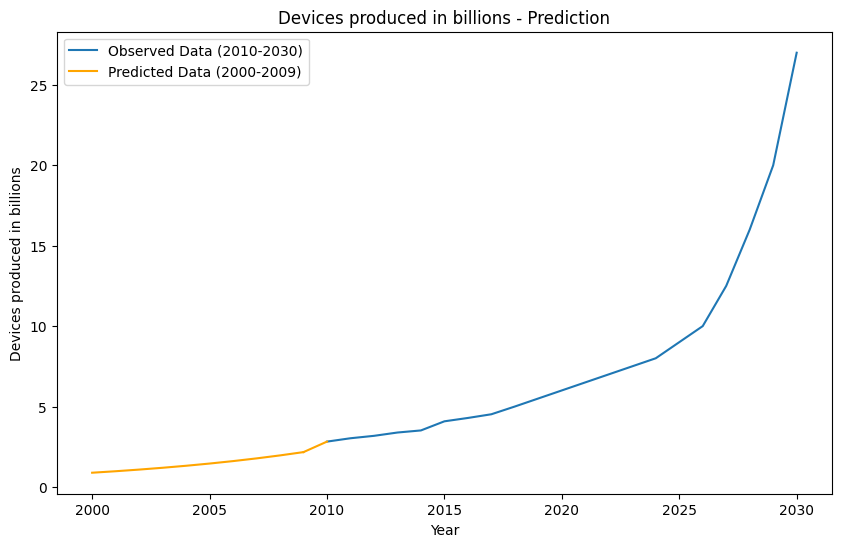

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2010, 2031),
    "Devices produced in billions": [2.817, 3.026, 3.176, 3.382, 3.512, 4.079, 4.288, 4.518, 5, 5.5, 6, 6.5, 7, 7.5, 8, 9, 10, 12.5, 16, 20, 27]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Devices produced in billions'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2010).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Devices produced in billions": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Devices produced in billions'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Devices produced in billions'].iloc[-1], df['Devices produced in billions'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Devices produced in billions'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Devices produced in billions - Prediction')
plt.xlabel('Year')
plt.ylabel('Devices produced in billions')
plt.legend()
plt.show()

### b. Future value

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   31
Model:                     AutoReg(8)   Log Likelihood                  -7.402
Method:               Conditional MLE   S.D. of innovations              0.334
Date:                Fri, 26 Jul 2024   AIC                             34.803
Time:                        10:41:40   BIC                             46.158
Sample:                             8   HQIC                            37.659
                                   31                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3659      0.184     -1.989      0.047      -0.726      -0.005
y.L1           1.8335      0.219      8.357      0.000       1.404       2.263
y.L2          -0.4462      0.489     -0.912      0.3

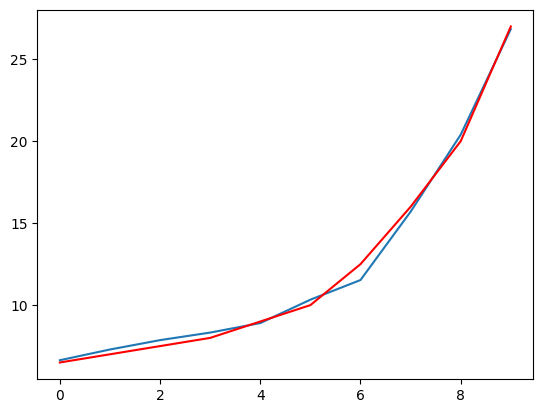

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Prepare the data
data = {
    "Year": np.arange(2000, 2031),
    "Devices produced in billions": [0.882431, 0.974952, 1.077174, 1.190113, 1.314894, 1.452757, 1.605076, 1.773365, 1.959298, 2.164726, 2.817, 3.026, 3.176, 3.382, 3.512, 4.079, 4.288, 4.518, 5, 5.5, 6, 6.5, 7, 7.5, 8, 9, 10, 12.5, 16, 20, 27]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values


train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

In [2]:
pred_future = model.predict(start=len(X), end=len(X)+4, dynamic=False)
print("The future prediction for the next 5 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 5 years
[ 36.58083327  50.78895054  72.53731142 103.81996772 151.23730371]
Number of predictions made: 	 5


## 2. Fillup column "Production of ICT hardware Electricity use (TWh)" with data

### a. Predict previous values

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Data preprocessing
data = {
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "Devices produced in billions": [0.882431, 0.974952, 1.077174, 1.190113, 1.314894, 1.452757, 1.605076, 1.773365, 1.959298, 2.164726, 2.817, 3.026, 3.176, 3.382, 3.512, 4.079, 4.288, 4.518, 5, 5.5, 6, 6.5, 7, 7.5, 8, 9, 10, 12.5, 16, 20, 27],
    "Production of ICT hardware Electricity use (TWh)": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 141, 149, 163, 173, 186, 202, 210, 220, 229, 241, 249, 229, 211, 196, 186, 177, 170, 164, 162, 160, 158],
}

df = pd.DataFrame(data)
df.dropna(inplace=True)  # Drop rows with NaN values for this example

X = df[["Devices produced in billions"]]
y = df["Production of ICT hardware Electricity use (TWh)"]

# Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    results[name] = mse

results


{'Linear Regression': 846.4820602060097,
 'Ridge Regression': 846.4822458043718,
 'Lasso Regression': 846.5091713090683,
 'SVR': 895.7338970289193}

[201.78241337 201.62144764 201.44360436 201.24711591 201.03002505
 200.79017445 200.52517366 200.23238867 199.90890708 199.55150859]
Mean Squared Error: 846.4820602060097
R^2 Score: 0.11652414113219212


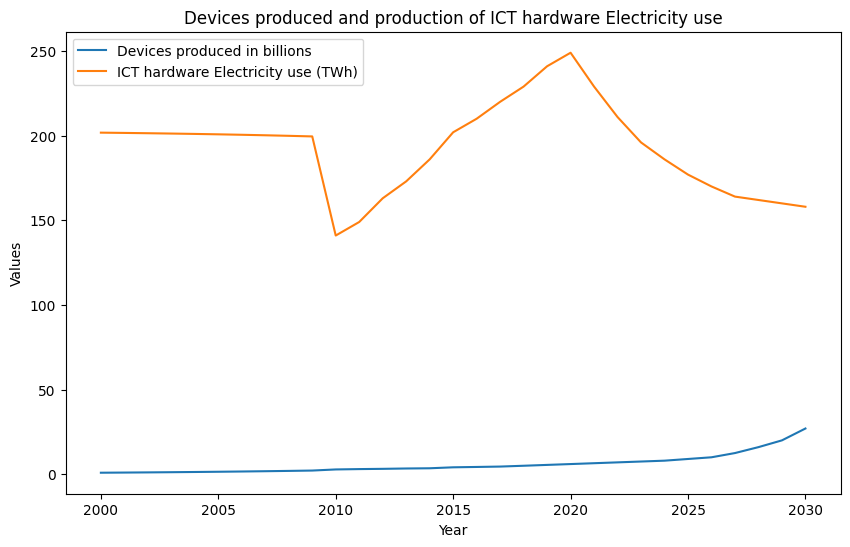

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "Devices produced in billions": [0.882431, 0.974952, 1.077174, 1.190113, 1.314894, 1.452757, 1.605076, 1.773365, 1.959298, 2.164726, 2.817, 3.026, 3.176, 3.382, 3.512, 4.079, 4.288, 4.518, 5, 5.5, 6, 6.5, 7, 7.5, 8, 9, 10, 12.5, 16, 20, 27],
    "Production of ICT hardware Electricity use (TWh)": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 141, 149, 163, 173, 186, 202, 210, 220, 229, 241, 249, 229, 211, 196, 186, 177, 170, 164, 162, 160, 158],
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["Devices produced in billions"]]
y = df["Production of ICT hardware Electricity use (TWh)"]

# Handle missing values in y by dropping those rows
df_non_nan = df.dropna(subset=["Production of ICT hardware Electricity use (TWh)"])
X_non_nan = df_non_nan[["Devices produced in billions"]]
y_non_nan = df_non_nan["Production of ICT hardware Electricity use (TWh)"]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_non_nan, y_non_nan)

# Predict on the full dataset
df_nan = df[df["Production of ICT hardware Electricity use (TWh)"].isna()]
X_nan = df_nan[["Devices produced in billions"]]
y_pred = model.predict(X_nan)

print(y_pred)

# Fill the NaN values with the predictions
df.loc[df["Production of ICT hardware Electricity use (TWh)"].isna(), "Production of ICT hardware Electricity use (TWh)"] = y_pred

# Evaluate the model
y_full_pred = model.predict(X_non_nan)
mse = mean_squared_error(y_non_nan, y_full_pred)
r2 = r2_score(y_non_nan, y_full_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Devices produced in billions'], label='Devices produced in billions')
plt.plot(df['Year'], df['Production of ICT hardware Electricity use (TWh)'], label='ICT hardware Electricity use (TWh)')
plt.title('Devices produced and production of ICT hardware Electricity use')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


### b. Future value prediction

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   31
Model:                     AutoReg(8)   Log Likelihood                 -90.835
Method:               Conditional MLE   S.D. of innovations             12.559
Date:                Fri, 26 Jul 2024   AIC                            201.670
Time:                        10:41:59   BIC                            213.025
Sample:                             8   HQIC                           204.526
                                   31                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.7799     48.148      3.132      0.002      56.412     245.148
y.L1           0.8454      0.207      4.093      0.000       0.441       1.250
y.L2          -0.1585      0.271     -0.584      0.5

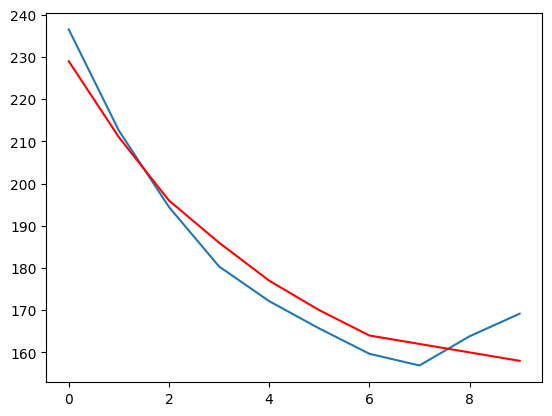

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Prepare the data
data = {
    "Year": np.arange(2000, 2031),
    "Production of ICT hardware Electricity use (TWh)": [201.7824134, 201.6214476, 201.4436044, 201.2471159, 201.0300251, 200.7901745, 200.5251737, 
                                                         200.2323887, 199.9089071, 199.5515086,
                                                         141, 149, 163, 173, 186, 202, 210, 220, 229, 241, 249, 229, 211, 196, 186, 177, 
                                                         170, 164, 162, 160, 158],
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

In [3]:
pred_future = model.predict(start=len(X), end=len(X)+4, dynamic=False)
print("The future prediction for the next 5 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 5 years
[173.20196172 190.07589958 204.96993253 217.47701747 226.34045911]
Number of predictions made: 	 5


# 3. Fillup column "Devices used in billions" with data

### a. Predict previous values

{'Linear Regression': 0.0029854677980059936, 'Ridge Regression': 0.019800339508543326, 'Lasso Regression': 0.08916492892402147, 'SVR': 0.006307819480050847}
The best model is: Linear Regression with MSE: 0.0029854677980059936
    Year  Predicted Devices used in billions
0   2000                            4.040328
1   2001                            4.385392
2   2002                            4.759925
3   2003                            5.166446
4   2004                            5.607685
5   2005                            6.086609
6   2006                            6.606435
7   2007                            7.170656
8   2008                            7.783065
9   2009                            8.447776
10  2010                            9.169257
11  2011                            9.952356
12  2012                           10.802335
13  2013                           11.724907
14  2014                           12.726270
15  2015                           13.813155
16  2016 

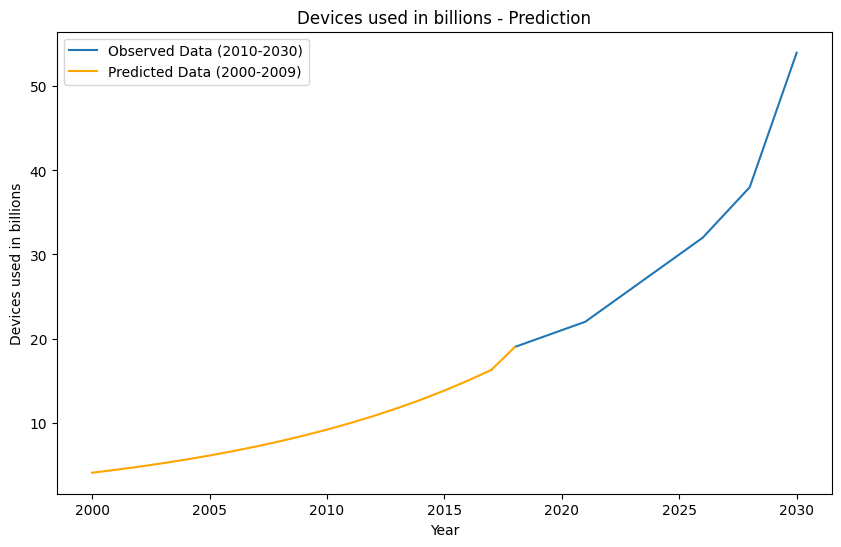

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2018, 2031),
    "Devices used in billions": [19, 20, 21, 22, 24, 26, 28, 30, 32, 35, 38, 46, 54]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Devices used in billions'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2018).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Devices used in billions": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Devices used in billions'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Devices used in billions'].iloc[-1], df['Devices used in billions'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Devices used in billions'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Devices used in billions - Prediction')
plt.xlabel('Year')
plt.ylabel('Devices used in billions')
plt.legend()
plt.show()

### b. Future value prediction

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   31
Model:                     AutoReg(8)   Log Likelihood                 -31.103
Method:               Conditional MLE   S.D. of innovations              0.936
Date:                Fri, 26 Jul 2024   AIC                             82.207
Time:                        10:42:38   BIC                             93.562
Sample:                             8   HQIC                            85.062
                                   31                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8534      0.511     -1.670      0.095      -1.855       0.148
y.L1           1.6905      0.207      8.152      0.000       1.284       2.097
y.L2           0.0158      0.618      0.026      0.9

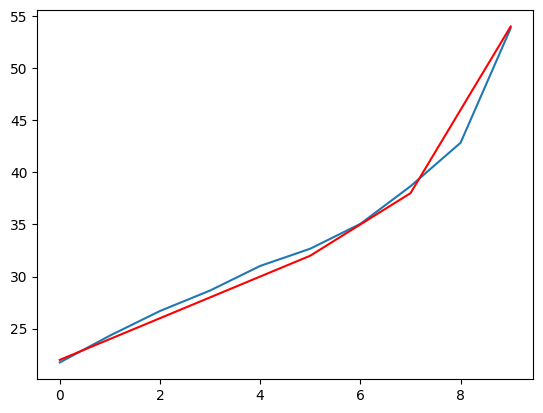

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Prepare the data
data = {
    "Year": np.arange(2000, 2031),
    "Devices used in billions": [4.040328, 4.385392, 4.759925, 5.166446, 5.607685,
                                 6.086609, 6.606435, 7.170656, 7.783065, 8.447776, 9.169257, 9.952356, 10.802335, 11.724907,
                                 12.72627, 13.813155, 14.992866, 16.273329, 
                                 19, 20, 21, 22, 24, 26, 28, 30, 32, 35, 38, 46, 54],
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

In [5]:
pred_future = model.predict(start=len(X), end=len(X)+4, dynamic=False)
print("The future prediction for the next 5 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 5 years
[ 65.86454203  78.59915505  97.2295931  121.29914032 154.59944913]
Number of predictions made: 	 5


# 4. Fillup column "Devices Electricity Usage" with datata

### a. Predict previous values

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Data preprocessing
data = {
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "Devices used in billions": [4.040328, 4.385392, 4.759925, 5.166446, 5.607685, 6.086609, 6.606435, 7.170656, 7.783065, 8.447776, 9.169257, 9.952356, 10.802335, 11.724907, 12.72627, 13.813155, 14.992866, 16.273329, 19, 20, 21, 22, 24, 26, 28, 30, 32, 35, 38, 46, 54],
    "Devices Electricity Usage": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 186, 144, np.nan, np.nan, 141, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
}

df = pd.DataFrame(data)
df.dropna(inplace=True)  # Drop rows with NaN values for this example

X = df[["Devices used in billions"]]
y = df["Devices Electricity Usage"]

# Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    results[name] = mse

results


{'Linear Regression': 207.24034905874785,
 'Ridge Regression': 209.76061696970078,
 'Lasso Regression': 207.60482083157729,
 'SVR': 581.1747223909914}

[ 37.5785407   42.36975564  47.57014775  53.21469336  59.34129853
  65.99116007  73.20894603  98.77597273 108.79373913 144.27894897
 158.18287799 189.65457196 207.43380552 245.29364259 259.17864635
 273.0636501  286.94865385 314.71866136 342.48866887 370.25867638
 398.02868389 425.7986914  467.45370266 509.10871393 620.18874396
 731.268774  ]
Mean Squared Error: 1338.829527267049
R^2 Score: 0.4469474854316553


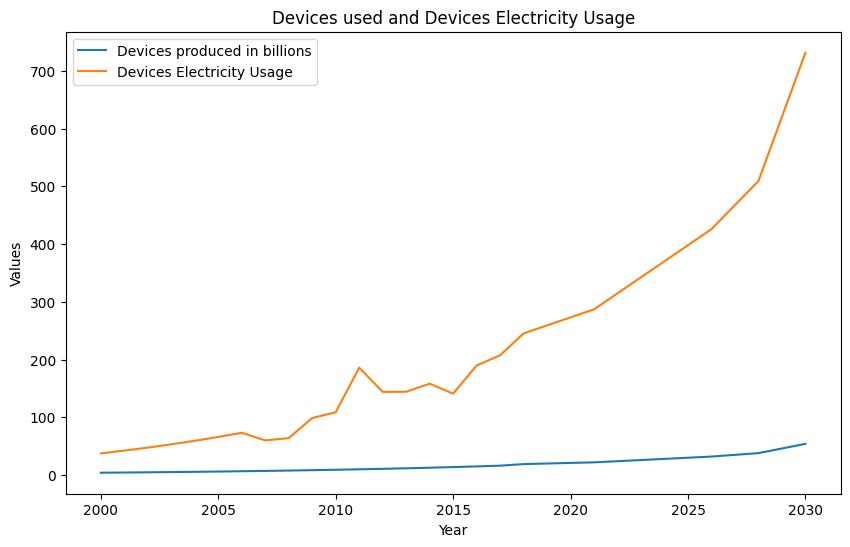

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "Devices used in billions": [4.040328, 4.385392, 4.759925, 5.166446, 5.607685, 6.086609, 6.606435, 7.170656, 7.783065, 8.447776, 9.169257, 9.952356, 10.802335, 11.724907, 12.72627, 13.813155, 14.992866, 16.273329, 19, 20, 21, 22, 24, 26, 28, 30, 32, 35, 38, 46, 54],
    "Devices Electricity Usage": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 60, 64, np.nan, np.nan, 186, 144, np.nan, np.nan, 141, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["Devices used in billions"]]
y = df["Devices Electricity Usage"]

# Handle missing values in y by dropping those rows
df_non_nan = df.dropna(subset=["Devices Electricity Usage"])
X_non_nan = df_non_nan[["Devices used in billions"]]
y_non_nan = df_non_nan["Devices Electricity Usage"]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_non_nan, y_non_nan)

# Predict on the full dataset
df_nan = df[df["Devices Electricity Usage"].isna()]
X_nan = df_nan[["Devices used in billions"]]
y_pred = model.predict(X_nan)

print(y_pred)

# Fill the NaN values with the predictions
df.loc[df["Devices Electricity Usage"].isna(), "Devices Electricity Usage"] = y_pred

# Evaluate the model
y_full_pred = model.predict(X_non_nan)
mse = mean_squared_error(y_non_nan, y_full_pred)
r2 = r2_score(y_non_nan, y_full_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Devices used in billions'], label='Devices produced in billions')
plt.plot(df['Year'], df['Devices Electricity Usage'], label='Devices Electricity Usage')
plt.title('Devices used and Devices Electricity Usage')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


### b. Future value predictions

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   31
Model:                     AutoReg(8)   Log Likelihood                -105.206
Method:               Conditional MLE   S.D. of innovations             23.458
Date:                Fri, 26 Jul 2024   AIC                            230.411
Time:                        10:43:35   BIC                            241.766
Sample:                             8   HQIC                           233.267
                                   31                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2355     10.732     -0.581      0.561     -27.269      14.798
y.L1           1.0064      0.237      4.246      0.000       0.542       1.471
y.L2           0.2434      0.331      0.735      0.4

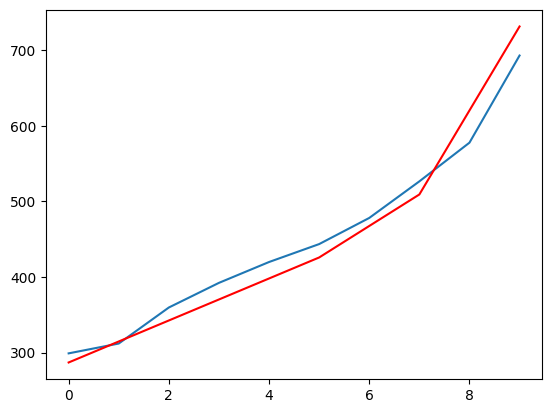

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Prepare the data
data = {
    "Year": np.arange(2000, 2031),
    "Devices Electricity Usage": [37.5785407, 42.36975564, 47.57014775, 53.21469336, 59.34129853, 65.99116007, 73.20894603, 
                                  60, 64, 98.77597273, 108.7937391, 186, 144, 144.278949, 158.182878, 141, 189.654572, 207.4338055, 
                                  245.2936426, 259.1786464, 273.0636501, 286.9486539, 314.7186614, 342.4886689, 370.2586764, 398.0286839, 
                                  425.7986914, 467.4537027, 509.1087139, 620.188744, 731.268774],
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

In [7]:
pred_future = model.predict(start=len(X), end=len(X)+4, dynamic=False)
print("The future prediction for the next 5 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 5 years
[ 820.71348111  910.02592306  972.34978547 1066.22976532 1190.68115447]
Number of predictions made: 	 5


# 5. Fillup column "Tablets shipments Global (Millions)" with data

### a. Predict previous values

   Year  Predicted Tablets shipments Global (Millions)
0  2000                                      81.523640
1  2001                                      83.797643
2  2002                                      86.135077
3  2003                                      88.537711
4  2004                                      91.007363
5  2005                                      93.545903
6  2006                                      96.155253
7  2007                                      98.837387
8  2008                                     101.594337
9  2009                                     104.428188


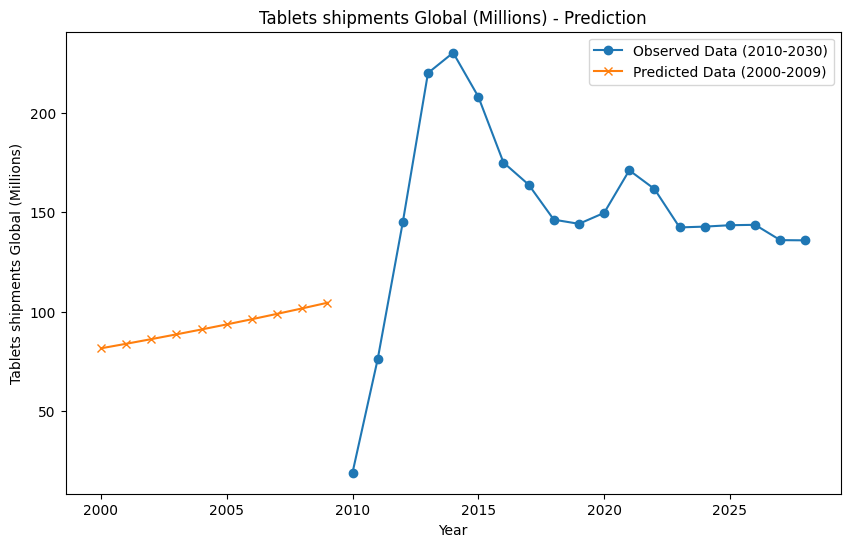

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2010, 2029),
    "Tablets shipments Global (Millions)": [19, 76, 145, 219.9, 230.1, 208, 174.9, 163.8, 146.2, 144.1, 149.6, 171, 161.61, 142.3, 142.7, 143.4, 143.6, 135.9, 135.8]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Train a linear regression model
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed["Tablets shipments Global (Millions)"].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2010).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = model.predict(years_to_predict_scaled)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Tablets shipments Global (Millions)": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df["Tablets shipments Global (Millions)"], label='Observed Data (2010-2030)', marker='o')
plt.plot(years_to_predict, predictions, label='Predicted Data (2000-2009)', marker='x')
plt.title('Tablets shipments Global (Millions) - Prediction')
plt.xlabel('Year')
plt.ylabel("Tablets shipments Global (Millions)")
plt.legend()
plt.show()


### b. Future Prediction

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   29
Model:                    AutoReg(12)   Log Likelihood                 -54.424
Method:               Conditional MLE   S.D. of innovations              5.944
Date:                Fri, 26 Jul 2024   AIC                            136.847
Time:                        10:44:10   BIC                            148.512
Sample:                            12   HQIC                           138.007
                                   29                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        131.7588     32.751      4.023      0.000      67.568     195.950
y.L1           0.8231      0.249      3.312      0.001       0.336       1.310
y.L2          -0.2504      0.216     -1.161      0.2

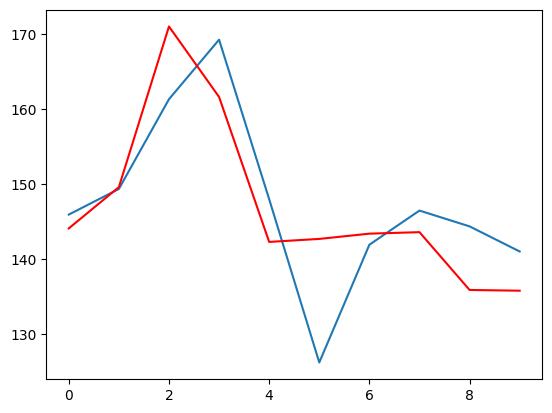

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Prepare the data
data = {
    "Year": np.arange(2000, 2029),
    "Tablets shipments Global (Millions)": [81.52364, 83.797643, 86.135077, 88.537711, 91.007363, 93.545903, 96.155253, 98.837387, 101.594337, 104.428188, 19, 76, 145, 219.9, 230.1, 208, 174.9, 163.8, 146.2, 144.1, 149.6, 171, 161.61, 142.3, 142.7, 143.4, 143.6, 135.9, 135.8]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=12).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

In [9]:
pred_future = model.predict(start=len(X)+1, end=len(X)+7, dynamic=False)
print("The future prediction for the next 10 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 10 years
[158.02137111 158.96599808 156.10840722 153.91935571 154.36417619
 153.89948963 152.77233844]
Number of predictions made: 	 7


# 6. Fillup column "Mobile Phone Shipments Global(Millions)" with data)

### Previous values prediction

   Year  Predicted Mobile Phone Shipments Global(Millions)
0  2000                                         168.701005
1  2001                                         187.763344
2  2002                                         208.979629
3  2003                                         232.593244
4  2004                                         258.875075
5  2005                                         288.126617
6  2006                                         320.683432
7  2007                                         356.918998
8  2008                                         397.248995


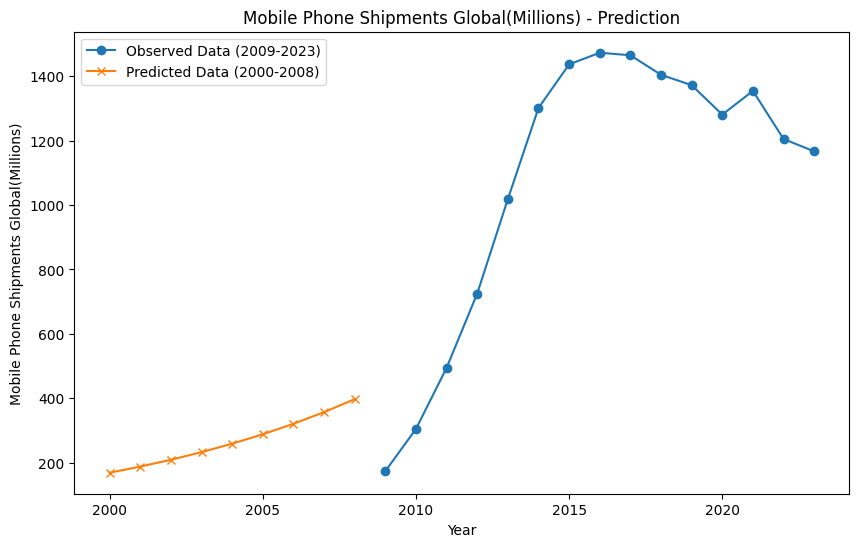

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2009, 2024),
    "Mobile Phone Shipments Global(Millions)": [173.5, 304.7, 494.5, 725.3, 1018.7, 1301.7, 1437.2, 1473.4, 1465.5, 1404.9, 1372.6, 1281.2, 1354.8, 1205.5, 1166.9]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Train a linear regression model
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed["Mobile Phone Shipments Global(Millions)"].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Predict for the years 2000 to 2008
years_to_predict = np.arange(2000, 2009).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Mobile Phone Shipments Global(Millions)": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df["Mobile Phone Shipments Global(Millions)"], label='Observed Data (2009-2023)', marker='o')
plt.plot(years_to_predict, predictions, label='Predicted Data (2000-2008)', marker='x')
plt.title('Mobile Phone Shipments Global(Millions) - Prediction')
plt.xlabel('Year')
plt.ylabel("Mobile Phone Shipments Global(Millions)")
plt.legend()
plt.show()


## Future value

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   24
Model:                     AutoReg(8)   Log Likelihood                 -97.359
Method:               Conditional MLE   S.D. of innovations            106.270
Date:                Fri, 26 Jul 2024   AIC                            214.717
Time:                        10:45:14   BIC                            222.443
Sample:                             8   HQIC                           215.113
                                   24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.1041     64.353      1.975      0.048       0.975     253.233
y.L1           1.2483      0.242      5.156      0.000       0.774       1.723
y.L2           0.0589      0.413      0.143      0.8

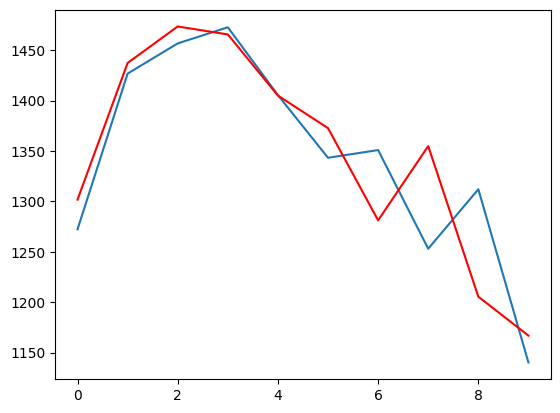

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Prepare the data
data = {
    "Year": np.arange(2000, 2024),
    "Mobile Phone Shipments Global(Millions)": [168.701005,187.763344, 208.979629, 232.593244, 258.875075, 288.126617, 320.683432, 356.918998, 397.248995, 173.5, 304.7, 494.5, 725.3, 1018.7, 1301.7, 1437.2, 1473.4, 1465.5, 1404.9, 1372.6, 1281.2, 1354.8, 1205.5, 1166.9]
}


# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

In [11]:
pred_future = model.predict(start=len(X)+1, end=len(X)+12, dynamic=False)
print("The future prediction for the next 10 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 10 years
[918.82969037 773.72284136 679.53200858 604.4786455  543.8305246
 526.59712943 513.78860662 512.09884765 517.51730748 540.85751171
 571.28816517 618.14189009]
Number of predictions made: 	 12


# 7. Fillup column "PC shipments worldwide (Millions)":

### a. Predict previous values:

{'Linear Regression': 0.08511294447789558, 'Ridge Regression': 0.08548342954873117, 'Lasso Regression': 0.08776691235989341, 'SVR': 0.025133966515239133}
The best model is: SVR with MSE: 0.025133966515239133
   Year  Predicted PC shipments worldwide
0  2000                        255.651535
1  2001                        248.985903
2  2002                        242.246054
3  2003                        237.054429
4  2004                        235.370401
5  2005                        239.097541


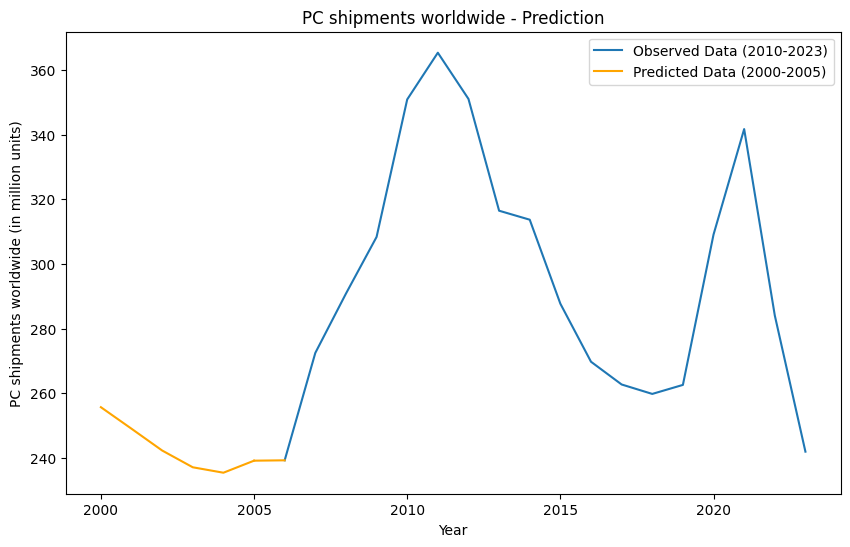

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2006, 2024),
    "PC shipments worldwide": [239.21, 272.45, 290.8, 308.34, 350.9, 365.36, 351.06, 316.46, 313.68, 287.68, 269.72, 262.68, 259.76, 262.55, 309.08, 341.73, 284.05, 241.89]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['PC shipments worldwide'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2005
years_to_predict = np.arange(2000, 2006).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted PC shipments worldwide": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['PC shipments worldwide'], label='Observed Data (2010-2023)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted PC shipments worldwide'].iloc[-1], df['PC shipments worldwide'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted PC shipments worldwide'], label='Predicted Data (2000-2005)', color='orange')
plt.title('PC shipments worldwide - Prediction')
plt.xlabel('Year')
plt.ylabel('PC shipments worldwide (in million units)')
plt.legend()
plt.show()

### b. Future value predictions

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   24
Model:                     AutoReg(8)   Log Likelihood                 -69.133
Method:               Conditional MLE   S.D. of innovations             18.208
Date:                Fri, 26 Jul 2024   AIC                            158.265
Time:                        10:45:59   BIC                            165.991
Sample:                             8   HQIC                           158.661
                                   24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        255.1269     95.083      2.683      0.007      68.767     441.486
y.L1           1.0774      0.262      4.112      0.000       0.564       1.591
y.L2          -1.1004      0.390     -2.823      0.0

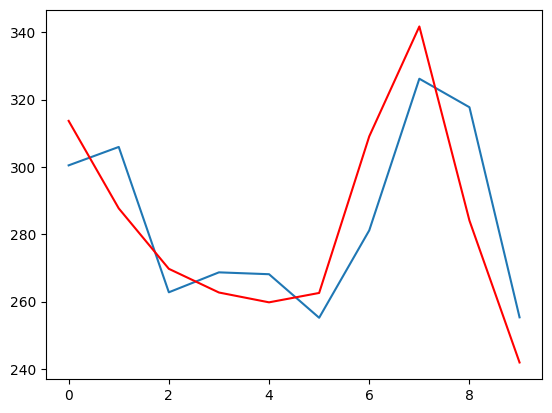

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Prepare the data
data = {
    "Year": np.arange(2000, 2024),
    "PC shipments worldwide": [255.651535, 248.985903, 242.246054, 237.054429, 235.370401, 239.097541, 239.21, 272.45, 290.8, 308.34, 350.9, 365.36, 351.06, 316.46, 313.68, 287.68, 269.72, 262.68, 259.76, 262.55, 309.08, 341.73, 284.05, 241.89]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)


In [13]:
pred_future = model.predict(start=len(X)+1, end=len(X)+12, dynamic=False)
print("The future prediction for the next 10 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 10 years
[334.96585422 303.70525567 280.41140772 298.46441186 301.75417939
 288.75258806 297.45662487 304.33335054 286.83807082 281.32784193
 299.63284326 303.13590447]
Number of predictions made: 	 12


# 8. Fillup Column "Desktop PCs worldwide installed base":"

### a. Past value prediction

{'Linear Regression': 0.006525714324939266, 'Ridge Regression': 0.025048081265749856, 'Lasso Regression': 0.08820935253391306, 'SVR': 0.007008905115898558}
The best model is: Linear Regression with MSE: 0.006525714324939266
   Year  Predicted Desktop PCs worldwide installed base
0  2000                                      580.815999
1  2001                                      598.807700
2  2002                                      617.356722
3  2003                                      636.480330
4  2004                                      656.196322


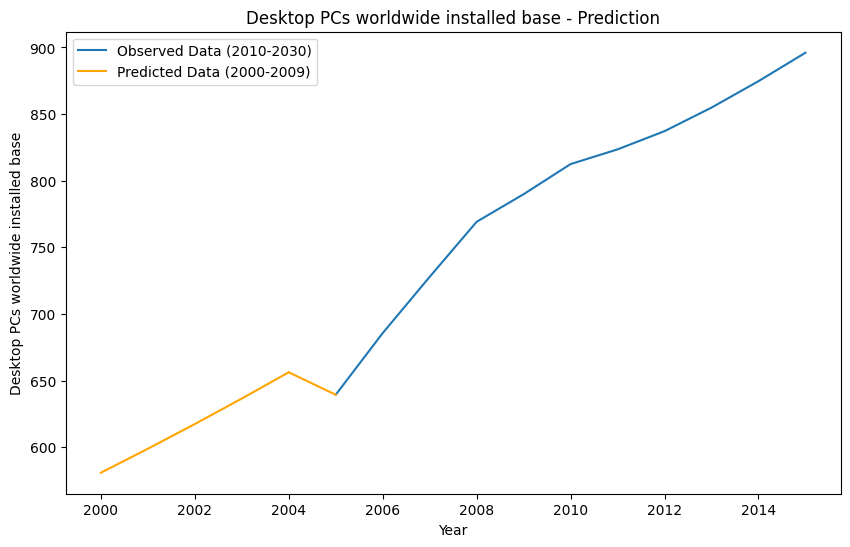

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2005, 2016),
    "Desktop PCs worldwide installed base": [639.355, 685.619, 727.826, 769.155, 789.861, 812.472, 823.51, 837.174, 854.858, 874.692, 896.053]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Desktop PCs worldwide installed base'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2005).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Desktop PCs worldwide installed base": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Desktop PCs worldwide installed base'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Desktop PCs worldwide installed base'].iloc[-1], df['Desktop PCs worldwide installed base'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Desktop PCs worldwide installed base'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Desktop PCs worldwide installed base - Prediction')
plt.xlabel('Year')
plt.ylabel('Desktop PCs worldwide installed base')
plt.legend()
plt.show()

### b. Future value predictions

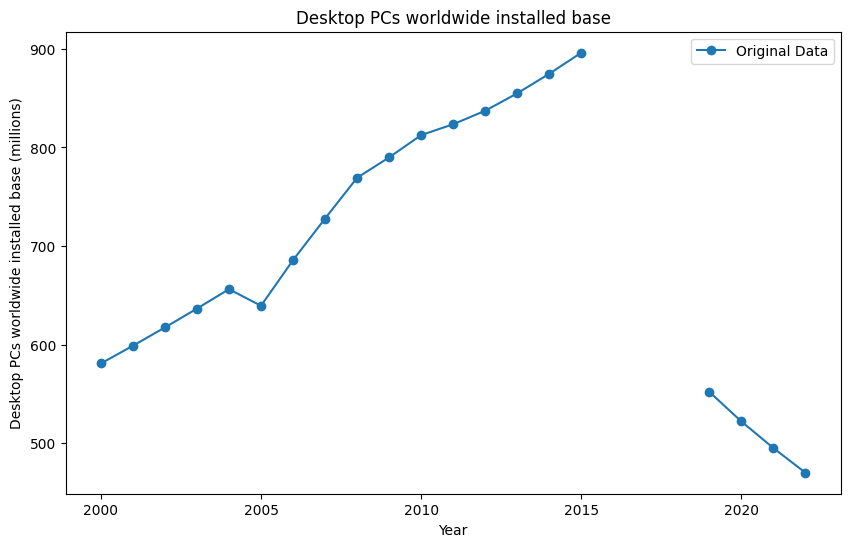

Mean Squared Error for each model:
Linear Regression: 30644.50662290924
Ridge Regression: 30628.293082279954
Lasso Regression: 30600.173216980987
Random Forest: 1069.724474446579

Best model: Random Forest


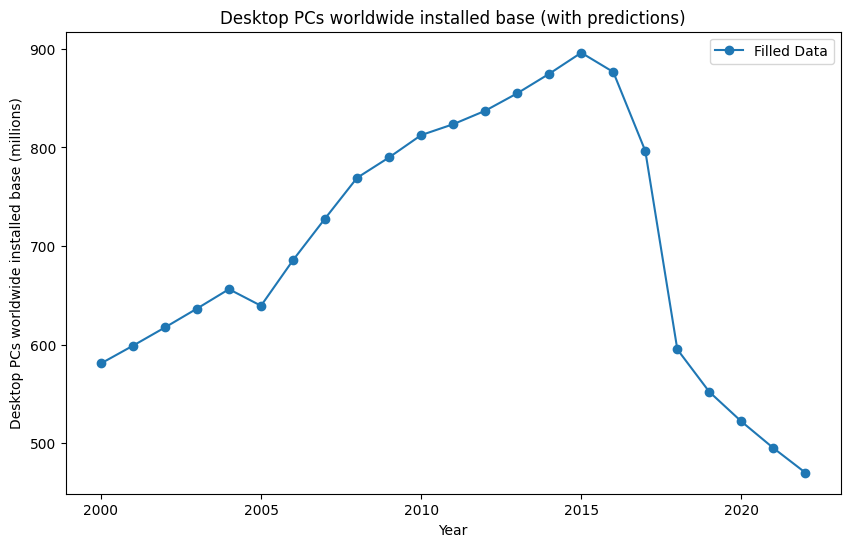


Filled DataFrame:
    Year  Desktop PCs worldwide installed base
0   2000                            580.815999
1   2001                            598.807700
2   2002                            617.356722
3   2003                            636.480330
4   2004                            656.196322
5   2005                            639.355000
6   2006                            685.619000
7   2007                            727.826000
8   2008                            769.155000
9   2009                            789.861000
10  2010                            812.472000
11  2011                            823.510000
12  2012                            837.174000
13  2013                            854.858000
14  2014                            874.692000
15  2015                            896.053000
16  2016                            876.506770
17  2017                            796.397330
18  2018                            595.110730
19  2019                            552.0

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2023),
    "Desktop PCs worldwide installed base": [
        580.815999, 598.8077, 617.356722, 636.48033, 656.196322, 639.355,
        685.619, 727.826, 769.155, 789.861, 812.472, 823.51, 837.174, 854.858,
        874.692, 896.053, np.nan, np.nan, np.nan, 552, 522, 495, 470
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Desktop PCs worldwide installed base'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Desktop PCs worldwide installed base (millions)')
plt.title('Desktop PCs worldwide installed base')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Desktop PCs worldwide installed base']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Desktop PCs worldwide installed base'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Desktop PCs worldwide installed base'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Desktop PCs worldwide installed base (millions)')
plt.title('Desktop PCs worldwide installed base (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


Mean Squared Error for each model:
Linear Regression: 30644.50662290924
Ridge Regression: 30628.293082279954
Lasso Regression: 30600.173216980987
Random Forest: 1274.7057080683107

Best model: Random Forest


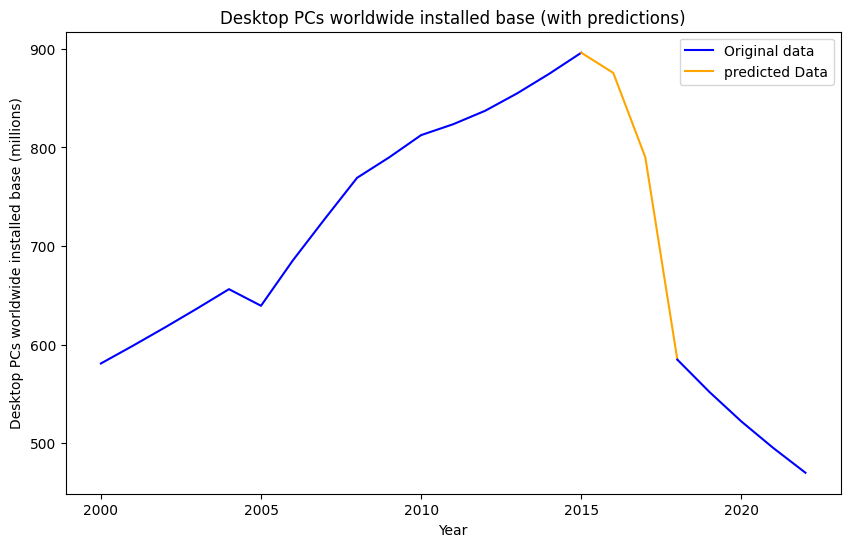


Filled DataFrame:
    Year  Desktop PCs worldwide installed base
0   2000                            580.815999
1   2001                            598.807700
2   2002                            617.356722
3   2003                            636.480330
4   2004                            656.196322
5   2005                            639.355000
6   2006                            685.619000
7   2007                            727.826000
8   2008                            769.155000
9   2009                            789.861000
10  2010                            812.472000
11  2011                            823.510000
12  2012                            837.174000
13  2013                            854.858000
14  2014                            874.692000
15  2015                            896.053000
16  2016                            875.602710
17  2017                            790.014610
18  2018                            584.732750
19  2019                            552.0

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2023),
    "Desktop PCs worldwide installed base": [
        580.815999, 598.8077, 617.356722, 636.48033, 656.196322, 639.355,
        685.619, 727.826, 769.155, 789.861, 812.472, 823.51, 837.174, 854.858,
        874.692, 896.053, np.nan, np.nan, np.nan, 552, 522, 495, 470
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Desktop PCs worldwide installed base']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Desktop PCs worldwide installed base'] = y_missing_pred

# Plot the known data and the predicted data with different colors for specified ranges
plt.figure(figsize=(10, 6))

# Plot the data for the different segments
plt.plot(df['Year'][:16], df['Desktop PCs worldwide installed base'][:16], color='blue', label='Original data')
plt.plot(df['Year'][15:19], df['Desktop PCs worldwide installed base'][15:19], color='orange', label='predicted Data')
plt.plot(df['Year'][18:], df['Desktop PCs worldwide installed base'][18:], color='blue')

plt.xlabel('Year')
plt.ylabel('Desktop PCs worldwide installed base (millions)')
plt.title('Desktop PCs worldwide installed base (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


Mean Squared Error for each model:
Linear Regression: 17150.100235008573
Ridge Regression: 17149.06487591894
Lasso Regression: 17143.504775481757
SVR: 20820.460468846897

Best model: Lasso Regression


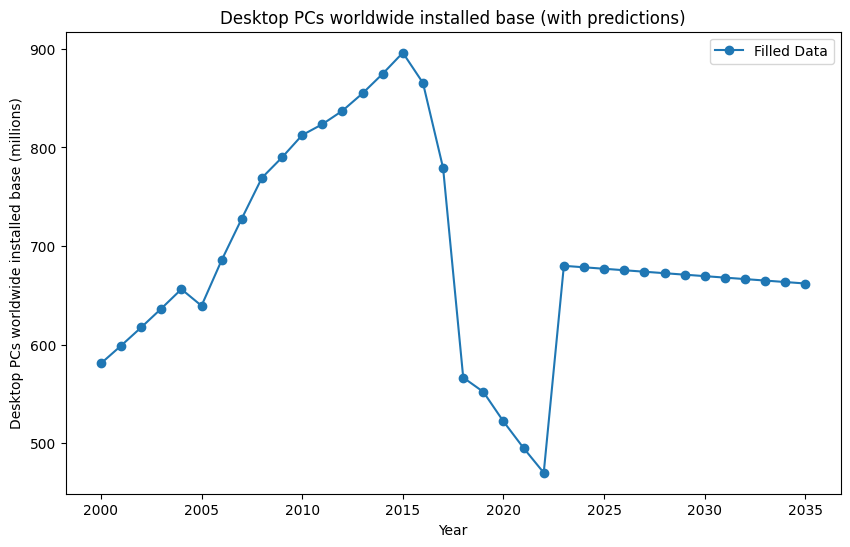


Filled DataFrame:
    Year  Desktop PCs worldwide installed base
0   2000                            580.815999
1   2001                            598.807700
2   2002                            617.356722
3   2003                            636.480330
4   2004                            656.196322
5   2005                            639.355000
6   2006                            685.619000
7   2007                            727.826000
8   2008                            769.155000
9   2009                            789.861000
10  2010                            812.472000
11  2011                            823.510000
12  2012                            837.174000
13  2013                            854.858000
14  2014                            874.692000
15  2015                            896.053000
16  2016                            865.413320
17  2017                            779.145060
18  2018                            566.524920
19  2019                            552.0

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Desktop PCs worldwide installed base": [
        580.815999, 598.8077, 617.356722, 636.48033, 656.196322, 639.355,
        685.619, 727.826, 769.155, 789.861, 812.472, 823.51, 837.174, 854.858,
        874.692, 896.053, 865.41332, 779.14506, 566.52492, 552, 522, 495, 470, 
        np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
        np.nan, np.nan, np.nan, np.nan, np.nan
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Desktop PCs worldwide installed base']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Desktop PCs worldwide installed base'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Desktop PCs worldwide installed base'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Desktop PCs worldwide installed base (millions)')
plt.title('Desktop PCs worldwide installed base (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


### Test AR:

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   23
Model:                     AutoReg(8)   Log Likelihood                 -76.567
Method:               Conditional MLE   S.D. of innovations             39.867
Date:                Sat, 27 Jul 2024   AIC                            173.135
Time:                        12:56:21   BIC                            180.215
Sample:                             8   HQIC                           173.059
                                   23                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        472.5965    153.956      3.070      0.002     170.848     774.345
y.L1           0.9268      0.242      3.832      0.000       0.453       1.401
y.L2          -0.1245      0.367     -0.339      0.7

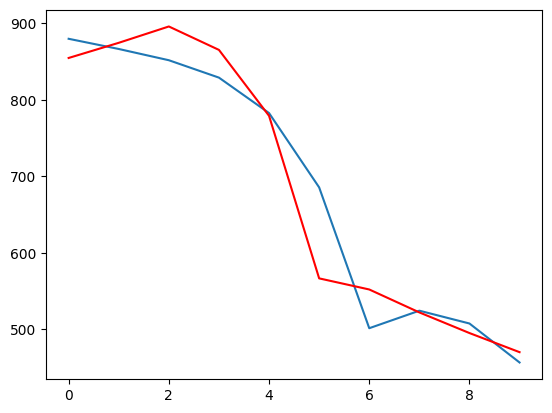

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Prepare the data
data = {
    "Year": np.arange(2000, 2023),
    "Desktop PCs worldwide installed base": [580.815999, 598.8077, 617.356722, 636.48033, 656.196322, 639.355,
        685.619, 727.826, 769.155, 789.861, 812.472, 823.51, 837.174, 854.858,
        874.692, 896.053, 865.41332, 779.14506, 566.52492, 552, 522, 495, 470]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, pred)
print(f'Mean Squared Error: {mse}')

In [16]:
pred_future = model.predict(start=len(X), end=len(X)+12, dynamic=False)
print("The future prediction for the next 10 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 10 years
[ 315.03741746   85.50389613  -81.383015     82.71348283  276.29974064
  457.44005955  516.82764334  353.02318448  244.12420944  514.84193177
 1215.69346634 1796.38263311 2033.95794246]
Number of predictions made: 	 13


# 9. Fillup column "Laptops worldwide installed base":

### a. Previous value prediction:

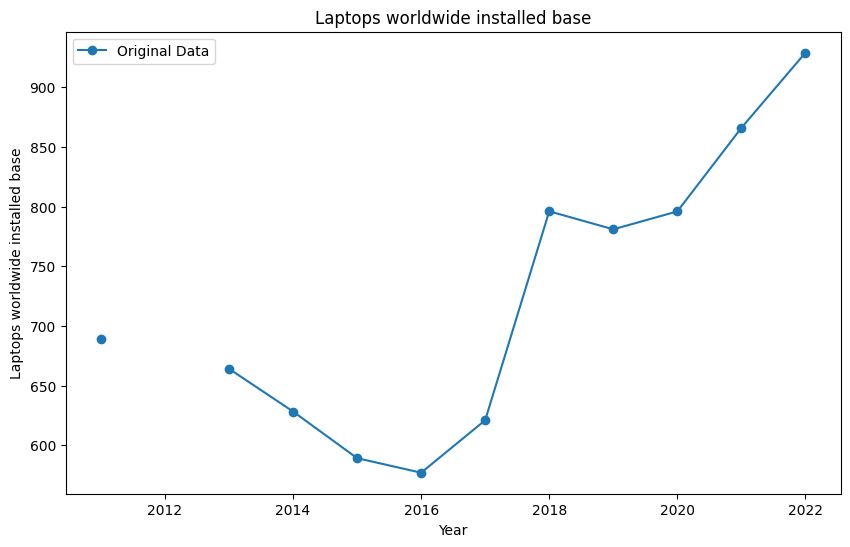

Mean Squared Error for each model:
Linear Regression: 5223.990921824893
Ridge Regression: 5292.514523602766
Lasso Regression: 5245.361555401467
SVR: 20496.240395045854

Best model: Linear Regression


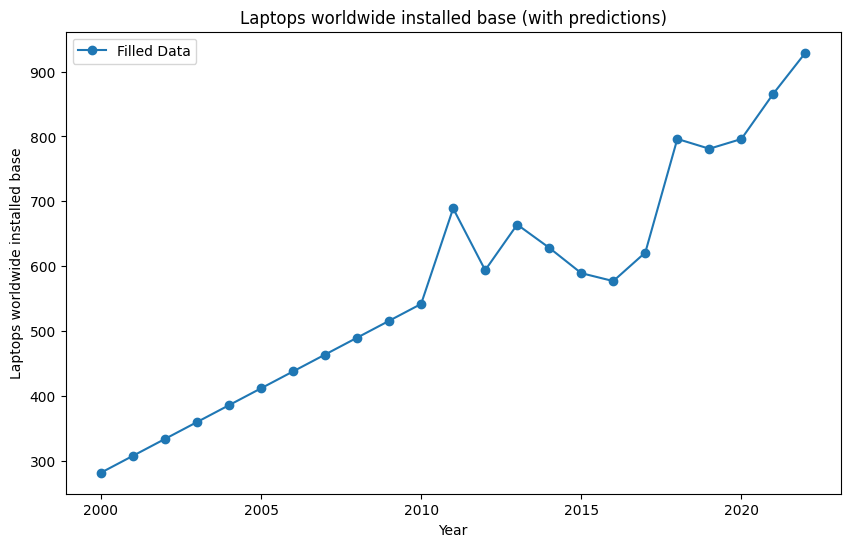


Filled DataFrame:
    Year  Laptops worldwide installed base
0   2000                        281.603925
1   2001                        307.620789
2   2002                        333.637654
3   2003                        359.654519
4   2004                        385.671383
5   2005                        411.688248
6   2006                        437.705113
7   2007                        463.721977
8   2008                        489.738842
9   2009                        515.755707
10  2010                        541.772571
11  2011                        689.000000
12  2012                        593.806301
13  2013                        664.140000
14  2014                        628.310000
15  2015                        589.230000
16  2016                        577.000000
17  2017                        621.000000
18  2018                        796.100000
19  2019                        781.000000
20  2020                        796.000000
21  2021                        866

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2023),
    "Laptops worldwide installed base": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 689, np.nan, 664.14, 628.31, 589.23, 577, 621, 796.1, 781, 796, 866, 929]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Laptops worldwide installed base'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Laptops worldwide installed base')
plt.title('Laptops worldwide installed base')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Laptops worldwide installed base']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Laptops worldwide installed base'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Laptops worldwide installed base'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Laptops worldwide installed base')
plt.title('Laptops worldwide installed base (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


### b. Future value prediction:

Mean Squared Error for each model:
Linear Regression: 4043.171403546352
Ridge Regression: 4040.090379129488
Lasso Regression: 4041.296678431528
SVR: 18520.027725746804

Best model: Ridge Regression


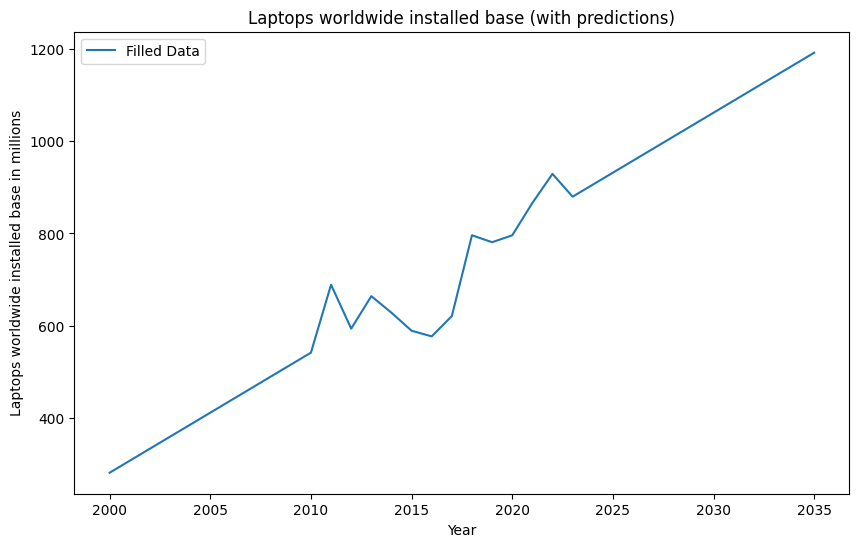


Filled DataFrame:
    Year  Laptops worldwide installed base
0   2000                        281.603925
1   2001                        307.620789
2   2002                        333.637654
3   2003                        359.654519
4   2004                        385.671383
5   2005                        411.688248
6   2006                        437.705113
7   2007                        463.721977
8   2008                        489.738842
9   2009                        515.755707
10  2010                        541.772571
11  2011                        689.000000
12  2012                        593.806301
13  2013                        664.140000
14  2014                        628.310000
15  2015                        589.230000
16  2016                        577.000000
17  2017                        621.000000
18  2018                        796.100000
19  2019                        781.000000
20  2020                        796.000000
21  2021                        866

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Laptops worldwide installed base": [281.603925, 307.620789, 333.637654, 359.654519, 385.671383, 
                                         411.688248, 437.705113, 463.721977, 489.738842, 515.755707, 
                                         541.772571, 689, 593.806301, 664.14, 628.31, 589.23, 577, 621, 
                                         796.1, 781, 796, 866, 929, np.nan, np.nan, np.nan, np.nan, np.nan, 
                                         np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Laptops worldwide installed base']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Laptops worldwide installed base'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Laptops worldwide installed base'], label='Filled Data')
plt.xlabel('Year')
plt.ylabel('Laptops worldwide installed base in millions')
plt.title('Laptops worldwide installed base (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   23
Model:                     AutoReg(8)   Log Likelihood                 -78.756
Method:               Conditional MLE   S.D. of innovations             46.129
Date:                Fri, 26 Jul 2024   AIC                            177.512
Time:                        10:48:39   BIC                            184.592
Sample:                             8   HQIC                           177.436
                                   23                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        294.9982    117.784      2.505      0.012      64.146     525.850
y.L1           0.1744      0.284      0.615      0.539      -0.382       0.731
y.L2          -0.0136      0.240     -0.057      0.9

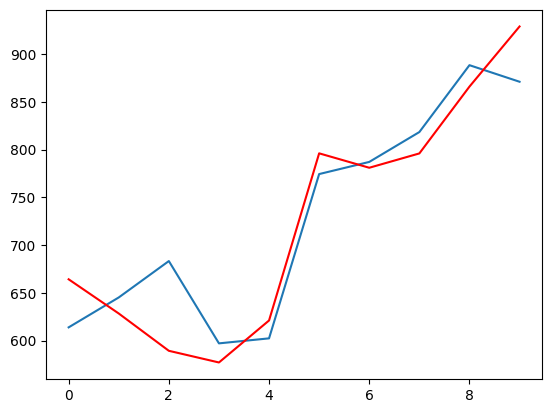

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Prepare the data
data = {
    "Year": np.arange(2000, 2023),
    "Laptops worldwide installed base": [281.603925, 307.620789, 333.637654, 359.654519, 385.671383, 
                                         411.688248, 437.705113, 463.721977, 489.738842, 515.755707, 
                                         541.772571, 689, 593.806301, 664.14, 628.31, 589.23, 577, 621, 
                                         796.1, 781, 796, 866, 929]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)


In [15]:
pred_future = model.predict(start=len(X)+1, end=len(X)+13, dynamic=False)
print("The future prediction for the next 10 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 10 years
[ 595.63968011  781.68281007  892.40779777  771.20904209  863.38214359
 1248.99744602 1184.25878205  692.91311836  701.4430894  1071.41127968
  814.2076197   395.80695954 1041.76322744]
Number of predictions made: 	 13


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   23
Model:                     AutoReg(8)   Log Likelihood                 -78.756
Method:               Conditional MLE   S.D. of innovations             46.129
Date:                Sat, 27 Jul 2024   AIC                            177.512
Time:                        11:01:27   BIC                            184.592
Sample:                             8   HQIC                           177.436
                                   23                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        294.9982    117.784      2.505      0.012      64.146     525.850
y.L1           0.1744      0.284      0.615      0.539      -0.382       0.731
y.L2          -0.0136      0.240     -0.057      0.9

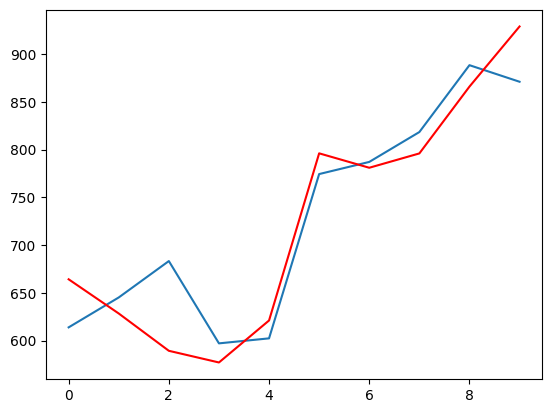

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2023),
    "Laptops worldwide installed base": [281.603925, 307.620789, 333.637654, 359.654519, 385.671383, 
                                         411.688248, 437.705113, 463.721977, 489.738842, 515.755707, 
                                         541.772571, 689, 593.806301, 664.14, 628.31, 589.23, 577, 621, 
                                         796.1, 781, 796, 866, 929]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)


mse = mean_squared_error(test, pred)
print(f'Mean Squared Error: {mse}')

# 10. Fillup column "Smartphones worldwide installed base":

### a. Previous value predictions

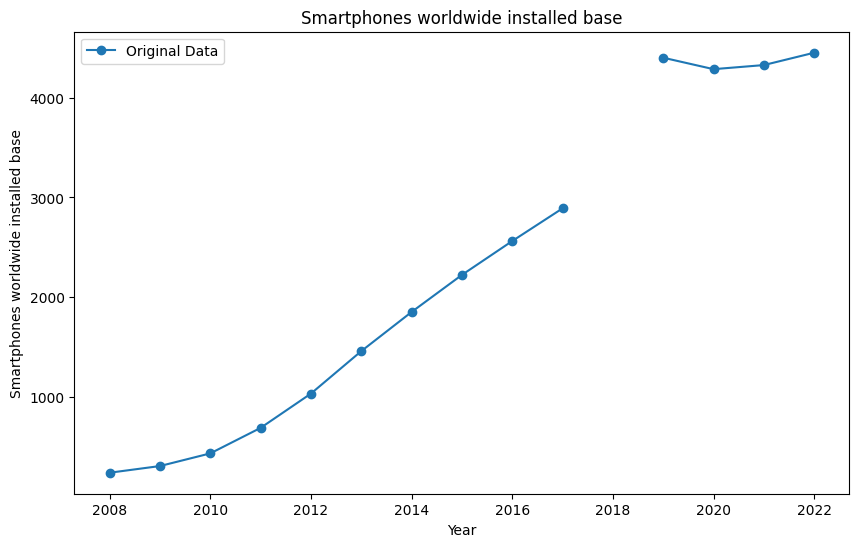

Mean Squared Error for each model:
Linear Regression: 69073.12070201627
Ridge Regression: 69105.46612148645
Lasso Regression: 69073.1724853746
SVR: 2474450.4564646403

Best model: Linear Regression


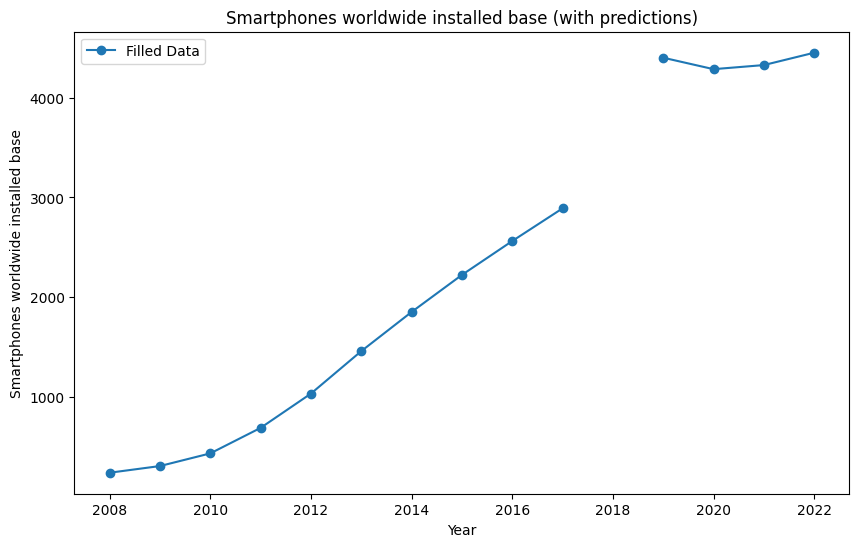


Filled DataFrame:
    Year  Smartphones worldwide installed base  \
0   2008                                 237.0   
1   2009                                 304.0   
2   2010                                 431.0   
3   2011                                 687.0   
4   2012                                1031.0   
5   2013                                1457.0   
6   2014                                1850.0   
7   2015                                2222.0   
8   2016                                2562.0   
9   2017                                2890.0   
10  2018                                   NaN   
11  2019                                4402.0   
12  2020                                4287.0   
13  2021                                4328.0   
14  2022                                4452.0   

    Laptops worldwide installed base  
0                                NaN  
1                                NaN  
2                                NaN  
3                       

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2008, 2023),
    "Smartphones worldwide installed base": [237, 304, 431, 687, 1031, 1457, 1850, 2222, 2562, 2890, np.nan, 4402, 4287, 4328, 4452]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Smartphones worldwide installed base'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Smartphones worldwide installed base')
plt.title('Smartphones worldwide installed base')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Smartphones worldwide installed base']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X, y)
    
    # Validate the model
    y_pred_val = model.predict(X)
    mse = mean_squared_error(y, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Laptops worldwide installed base'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Smartphones worldwide installed base'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Smartphones worldwide installed base')
plt.title('Smartphones worldwide installed base (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


{'Linear Regression': 0.00930107951913777, 'Ridge Regression': 0.026542898005632084, 'Lasso Regression': 0.11099262120478812}
The best model is: Linear Regression with MSE: 0.00930107951913777
   Year  Predicted Smartphones worldwide installed base
0  2000                                       62.336475
1  2001                                       77.403497
2  2002                                       96.112291
3  2003                                      119.343088
4  2004                                      148.188880
5  2005                                      184.006836
6  2006                                      228.482164
7  2007                                      283.707389


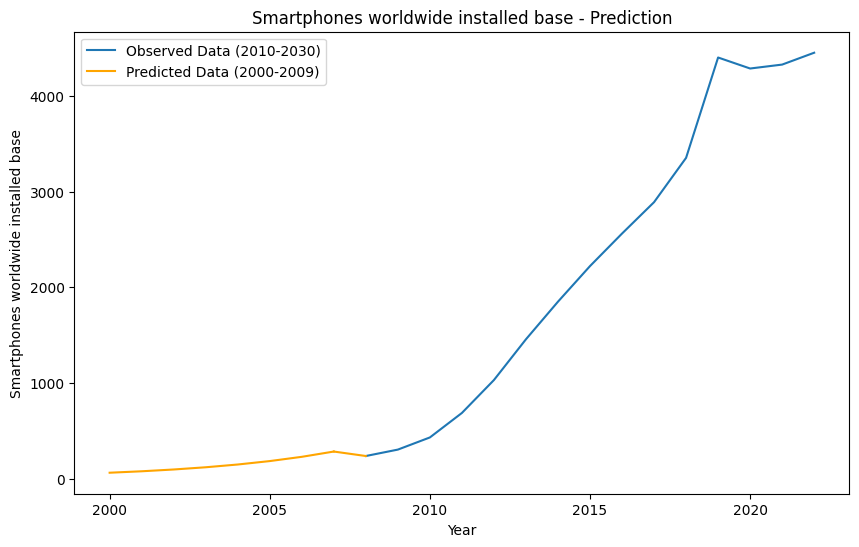

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2008, 2023),
    "Smartphones worldwide installed base": [237, 304, 431, 687, 1031, 1457, 1850, 2222, 2562, 2890, 3353.112285, 4402, 4287, 4328, 4452]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Smartphones worldwide installed base'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2008).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Smartphones worldwide installed base": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Smartphones worldwide installed base'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Smartphones worldwide installed base'].iloc[-1], df['Smartphones worldwide installed base'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Smartphones worldwide installed base'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Smartphones worldwide installed base - Prediction')
plt.xlabel('Year')
plt.ylabel('Smartphones worldwide installed base')
plt.legend()
plt.show()

### b. Future value predictions:

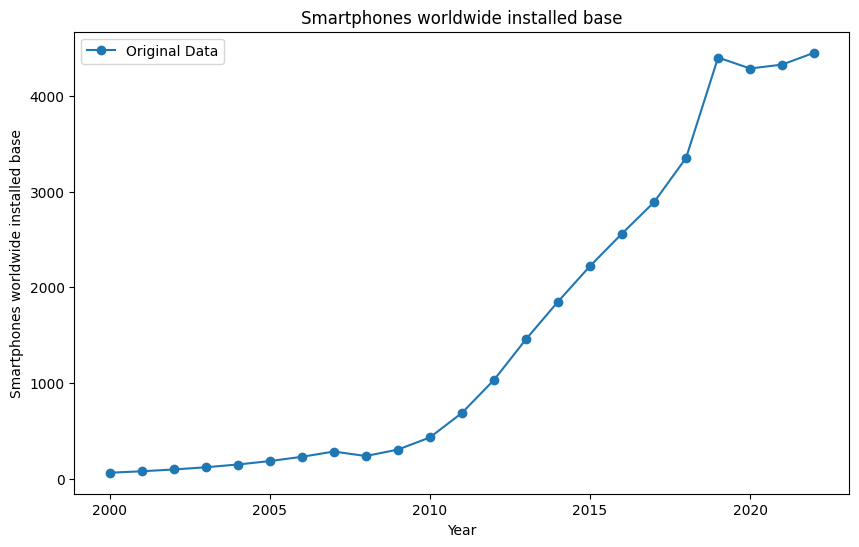

Mean Squared Error for each model:
Linear Regression: 335056.9414562077
Ridge Regression: 334968.7120202173
Lasso Regression: 335050.58108016534
SVR: 2565755.8303808016

Best model: Ridge Regression


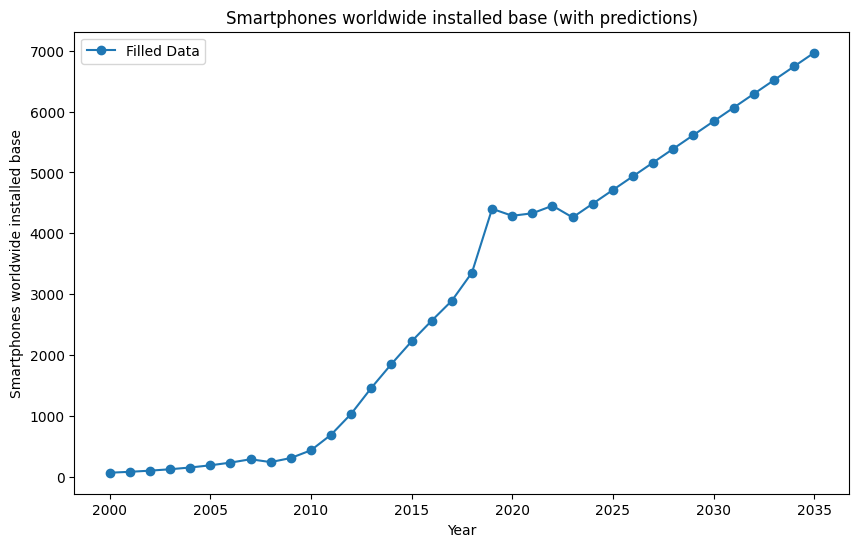


Filled DataFrame:
    Year  Smartphones worldwide installed base
0   2000                             62.336475
1   2001                             77.403497
2   2002                             96.112291
3   2003                            119.343088
4   2004                            148.188880
5   2005                            184.006836
6   2006                            228.482164
7   2007                            283.707389
8   2008                            237.000000
9   2009                            304.000000
10  2010                            431.000000
11  2011                            687.000000
12  2012                           1031.000000
13  2013                           1457.000000
14  2014                           1850.000000
15  2015                           2222.000000
16  2016                           2562.000000
17  2017                           2890.000000
18  2018                           3353.112285
19  2019                           4402.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Smartphones worldwide installed base": [62.336475, 77.403497, 96.112291, 119.343088, 148.18888, 184.006836, 
                                             228.482164, 283.707389, 237, 304, 431, 687, 1031, 1457, 1850, 2222, 
                                             2562, 2890, 3353.112285, 4402, 4287, 4328, 4452, np.nan, np.nan, np.nan, 
                                             np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Smartphones worldwide installed base'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Smartphones worldwide installed base')
plt.title('Smartphones worldwide installed base')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Smartphones worldwide installed base']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Smartphones worldwide installed base'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Smartphones worldwide installed base'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Smartphones worldwide installed base')
plt.title('Smartphones worldwide installed base (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 11. Fillup column "Tablets worldwide installed base":

### a. Predict previous values:

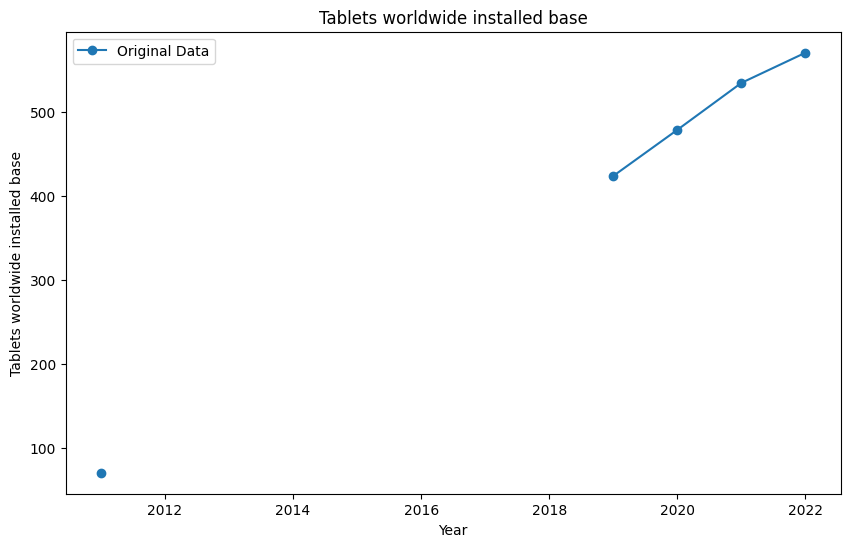

Mean Squared Error for each model:
Linear Regression: 2.061224489819083
Ridge Regression: 4.0997229916500855
Lasso Regression: 1.5130739795838555
SVR: 12282.993002555184

Best model: Lasso Regression


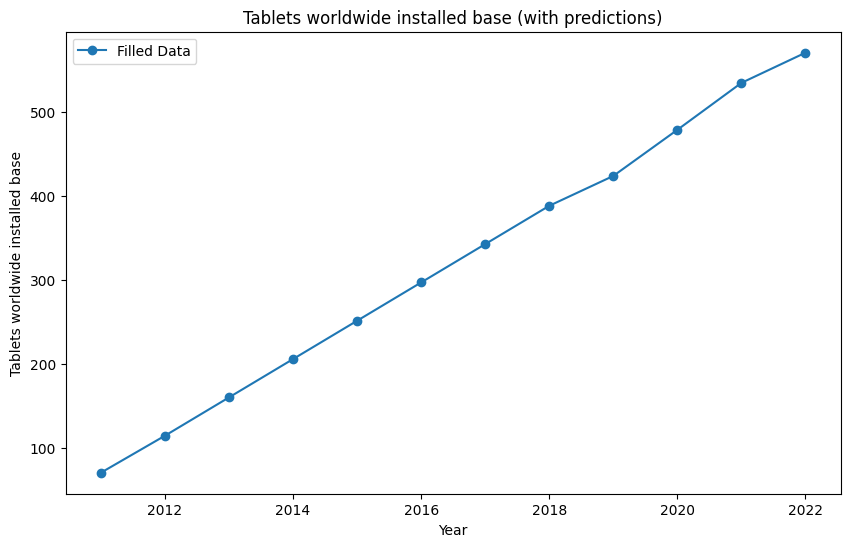


Filled DataFrame:
    Year  Tablets worldwide installed base
0   2011                         70.000000
1   2012                        114.132124
2   2013                        159.839378
3   2014                        205.546632
4   2015                        251.253886
5   2016                        296.961140
6   2017                        342.668394
7   2018                        388.375648
8   2019                        424.000000
9   2020                        479.000000
10  2021                        535.000000
11  2022                        571.000000


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2011, 2023),
    "Tablets worldwide installed base": [70, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 424, 479, 535, 571]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Tablets worldwide installed base'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Tablets worldwide installed base')
plt.title('Tablets worldwide installed base')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Tablets worldwide installed base']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Tablets worldwide installed base'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Tablets worldwide installed base'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Tablets worldwide installed base')
plt.title('Tablets worldwide installed base (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


{'Linear Regression': 0.006630719913030034, 'Ridge Regression': 0.02382162856389952, 'Lasso Regression': 0.0884651280361785, 'SVR': 0.007602670829550817}
The best model is: Linear Regression with MSE: 0.006630719913030034
    Year  Predicted Tablets worldwide installed base
0   2000                                   15.405794
1   2001                                   18.332516
2   2002                                   21.815243
3   2003                                   25.959602
4   2004                                   30.891288
5   2005                                   36.759873
6   2006                                   43.743345
7   2007                                   52.053504
8   2008                                   61.942390
9   2009                                   73.709920
10  2010                                   87.712991


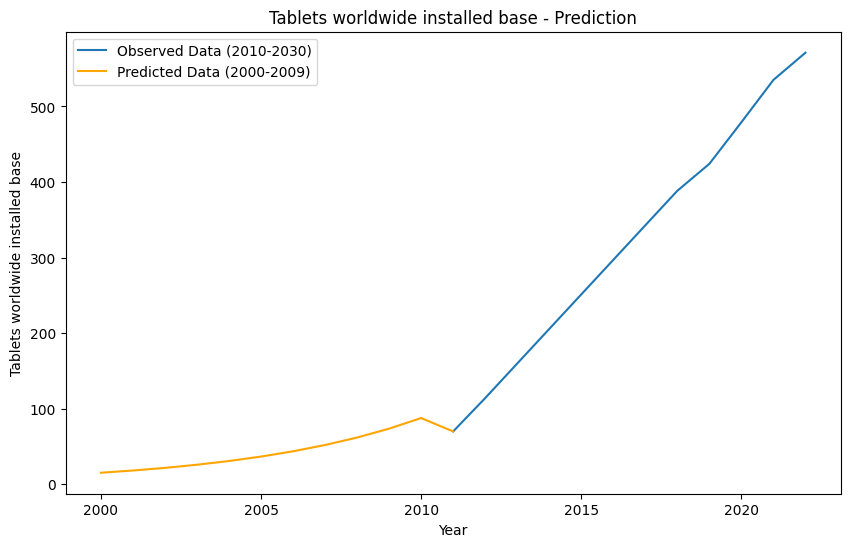

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2011, 2023),
    "Tablets worldwide installed base": [70, 114.132124, 159.839378, 205.546632, 251.253886, 296.96114, 342.668394, 388.375648, 424, 479, 535, 571]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Tablets worldwide installed base'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2011).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Tablets worldwide installed base": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Tablets worldwide installed base'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Tablets worldwide installed base'].iloc[-1], df['Tablets worldwide installed base'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Tablets worldwide installed base'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Tablets worldwide installed base - Prediction')
plt.xlabel('Year')
plt.ylabel('Tablets worldwide installed base')
plt.legend()
plt.show()

### b. Predict Future values

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   23
Model:                     AutoReg(8)   Log Likelihood                 -62.651
Method:               Conditional MLE   S.D. of innovations             15.765
Date:                Fri, 26 Jul 2024   AIC                            145.303
Time:                        10:50:14   BIC                            152.383
Sample:                             8   HQIC                           145.227
                                   23                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0451      7.992      1.757      0.079      -1.619      29.709
y.L1           1.2857      0.275      4.669      0.000       0.746       1.825
y.L2          -0.1725      0.442     -0.391      0.6

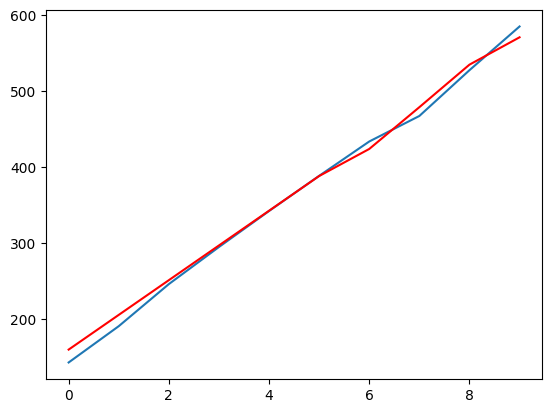

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Prepare the data
data = {
    "Year": np.arange(2000, 2023),
    "Tablets worldwide installed base": [15.405794, 18.332516, 21.815243, 25.959602, 30.891288, 36.759873, 43.743345, 
                                         52.053504, 61.94239, 73.70992, 87.712991, 70, 114.132124, 159.839378, 205.546632, 
                                         251.253886, 296.96114, 342.668394, 388.375648, 424, 479, 535, 571]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

from statsmodels.tsa.ar_model import AutoReg

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

In [17]:
pred_future = model.predict(start=len(X), end=len(X)+12, dynamic=False)
print("The future prediction for the next 10 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 10 years
[ 619.44506885  671.07183057  722.81295946  777.06040342  833.46239571
  892.2524195   953.66676569 1017.30500194 1083.41047814 1152.13029806
 1223.47676807 1297.54709318 1374.44247319]
Number of predictions made: 	 13


# 12. Fillup column "Laptop shipments worldwide":

### a. predict previous values:

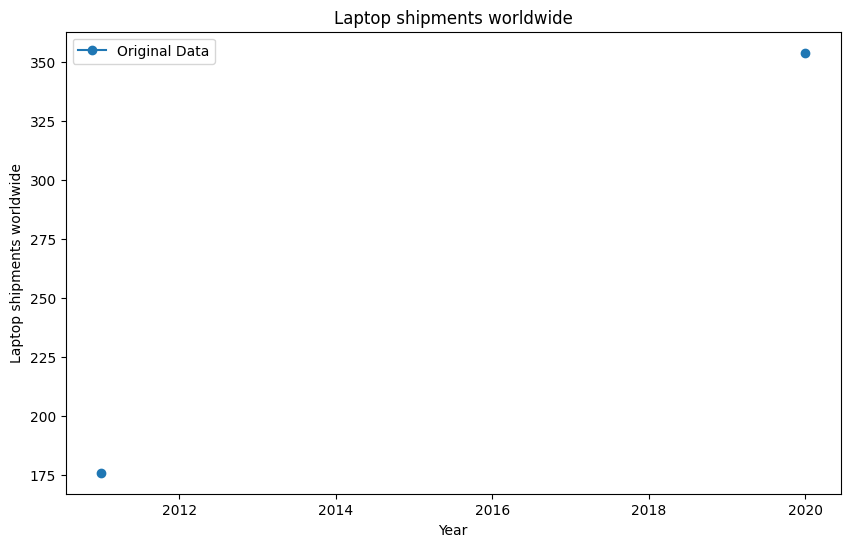

Mean Squared Error for each model:
Linear Regression: 31684.0
Ridge Regression: 31684.0
Lasso Regression: 31684.0
SVR: 31684.0

Best model: Linear Regression


C:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


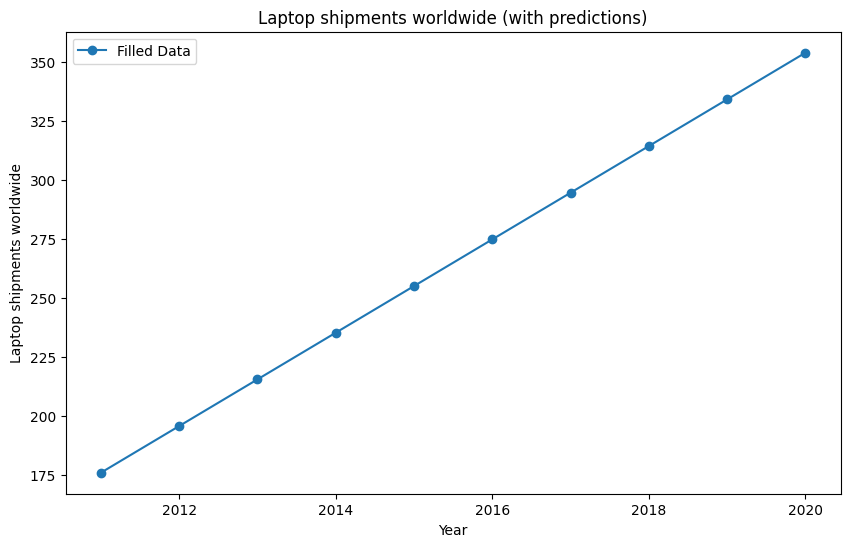


Filled DataFrame:
   Year  Laptop shipments worldwide
0  2011                  176.000000
1  2012                  195.777778
2  2013                  215.555556
3  2014                  235.333333
4  2015                  255.111111
5  2016                  274.888889
6  2017                  294.666667
7  2018                  314.444444
8  2019                  334.222222
9  2020                  354.000000


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2011, 2021),
    "Laptop shipments worldwide": [176, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 354]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Laptop shipments worldwide'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Laptop shipments worldwide')
plt.title('Laptop shipments worldwide')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Laptop shipments worldwide']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Laptop shipments worldwide'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Laptop shipments worldwide'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Laptop shipments worldwide')
plt.title('Laptop shipments worldwide (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


{'Linear Regression': 0.0009600377621335546, 'Ridge Regression': 0.0254094278860895, 'Lasso Regression': 0.10057704875757786, 'SVR': 0.005543238317637782}
The best model is: Linear Regression with MSE: 0.0009600377621335546
    Year  Predicted Laptop shipments worldwide
0   2000                             78.690040
1   2001                             84.970648
2   2002                             91.752541
3   2003                             99.075728
4   2004                            106.983411
5   2005                            115.522242
6   2006                            124.742596
7   2007                            134.698868
8   2008                            145.449795
9   2009                            157.058803
10  2010                            169.594378


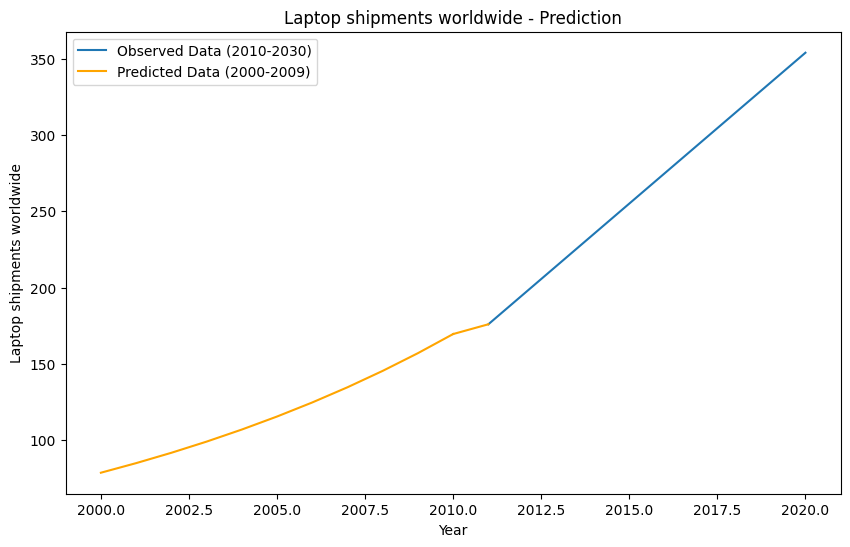

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2011, 2021),
    "Laptop shipments worldwide": [176, 195.777778, 215.555556, 235.333333, 255.111111, 274.888889, 294.666667, 314.444444, 334.222222, 354]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Laptop shipments worldwide'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2011).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Laptop shipments worldwide": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Laptop shipments worldwide'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Laptop shipments worldwide'].iloc[-1], df['Laptop shipments worldwide'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Laptop shipments worldwide'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Laptop shipments worldwide - Prediction')
plt.xlabel('Year')
plt.ylabel('Laptop shipments worldwide')
plt.legend()
plt.show()

### Predict Future values:

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   21
Model:                     AutoReg(8)   Log Likelihood                 -32.408
Method:               Conditional MLE   S.D. of innovations              2.927
Date:                Fri, 26 Jul 2024   AIC                             84.815
Time:                        10:50:51   BIC                             90.465
Sample:                             8   HQIC                            83.654
                                   21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3878      3.860      0.360      0.719      -6.178       8.953
y.L1           1.0111      0.294      3.436      0.001       0.434       1.588
y.L2          -0.1369      0.406     -0.337      0.7

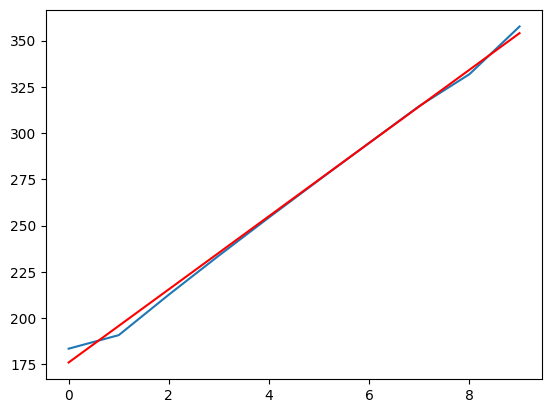

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Prepare the data
data = {
    "Year": np.arange(2000, 2021),
    "Laptop shipments worldwide": [78.69004, 84.970648, 91.752541, 99.075728, 106.983411, 115.522242, 124.742596, 134.698868, 145.449795, 157.058803, 169.594378, 176, 195.777778, 215.555556, 235.333333, 255.111111, 274.888889, 294.666667, 314.444444, 334.222222, 354]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

from statsmodels.tsa.ar_model import AutoReg

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

In [19]:
pred_future = model.predict(start=len(X), end=len(X)+14, dynamic=False)
print("The future prediction for the next 10 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 10 years
[ 383.40415164  418.92550107  459.31410762  502.62674957  546.5159816
  588.70462273  627.69752651  663.79628988  704.03181803  753.70394027
  816.53164052  893.34111896  981.38682889 1074.69584447 1165.73471753]
Number of predictions made: 	 15


# 13.Fillup column "Smartphone Energy demand yearly TEC":

### a. Predict Previous values:

{'Linear Regression': 0.03282605368136063, 'Ridge Regression': 0.047180053542519515, 'Lasso Regression': 0.11748535898493097, 'SVR': 0.02059866924160625}
The best model is: SVR with MSE: 0.02059866924160625
   Year  Predicted Smartphone Energy demand yearly TEC
0  2000                                       3.801154
1  2001                                       3.732807
2  2002                                       3.601850
3  2003                                       3.388189
4  2004                                       3.096927
5  2005                                       2.772190
6  2006                                       2.485894
7  2007                                       2.306947
8  2008                                       2.277172


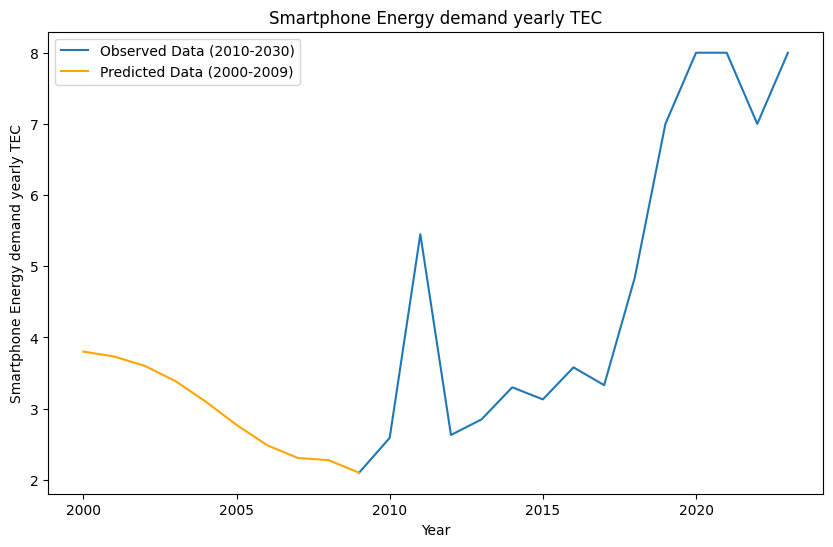

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2009, 2024),
    "Smartphone Energy demand yearly TEC": [2.1, 2.59, 5.45, 2.63, 2.85, 3.3, 3.13, 3.58, 3.33, 4.84, 7, 8, 8, 7, 8]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Smartphone Energy demand yearly TEC'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2009).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Smartphone Energy demand yearly TEC": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Smartphone Energy demand yearly TEC'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Smartphone Energy demand yearly TEC'].iloc[-1], df['Smartphone Energy demand yearly TEC'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Smartphone Energy demand yearly TEC'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Smartphone Energy demand yearly TEC')
plt.xlabel('Year')
plt.ylabel('Smartphone Energy demand yearly TEC')
plt.legend()
plt.show()

### b. Predict Future value:

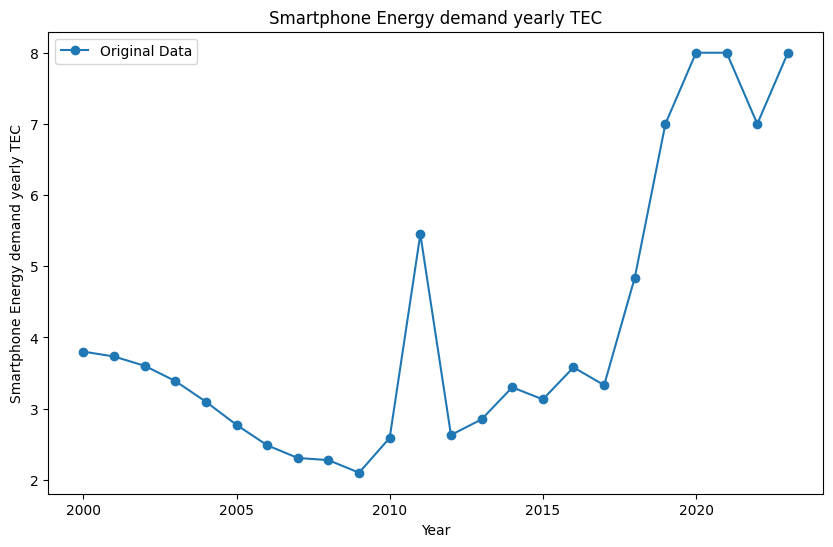

Mean Squared Error for each model:
Linear Regression: 1.7521555659639323
Ridge Regression: 1.750125553954709
Lasso Regression: 1.621176734421943
SVR: 1.6407989665037892

Best model: Lasso Regression


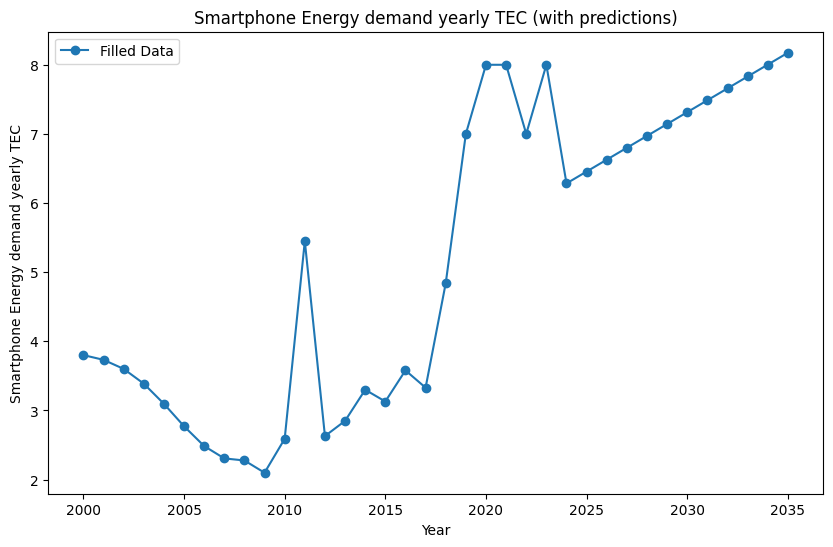


Filled DataFrame:
    Year  Smartphone Energy demand yearly TEC
0   2000                             3.801154
1   2001                             3.732807
2   2002                             3.601850
3   2003                             3.388189
4   2004                             3.096927
5   2005                             2.772190
6   2006                             2.485894
7   2007                             2.306947
8   2008                             2.277172
9   2009                             2.100000
10  2010                             2.590000
11  2011                             5.450000
12  2012                             2.630000
13  2013                             2.850000
14  2014                             3.300000
15  2015                             3.130000
16  2016                             3.580000
17  2017                             3.330000
18  2018                             4.840000
19  2019                             7.000000
20  2020       

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Smartphone Energy demand yearly TEC": [3.801154, 3.732807, 3.60185, 3.388189, 3.096927, 2.77219, 2.485894, 2.306947, 
                                            2.277172, 2.1, 2.59, 5.45, 2.63, 2.85, 3.3, 3.13, 3.58, 3.33, 4.84, 7, 8, 8, 7, 8,
                                            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
                                           ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Smartphone Energy demand yearly TEC'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Smartphone Energy demand yearly TEC')
plt.title('Smartphone Energy demand yearly TEC')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Smartphone Energy demand yearly TEC']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Smartphone Energy demand yearly TEC'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Smartphone Energy demand yearly TEC'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Smartphone Energy demand yearly TEC')
plt.title('Smartphone Energy demand yearly TEC (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 14. Fillup column "Emissions per Smartphone":

### a. Predict past values

{'Linear Regression': 0.042793106082398655, 'Ridge Regression': 0.04888399917623829, 'Lasso Regression': 0.07871694494198363, 'SVR': 0.03851498304063436}
The best model is: SVR with MSE: 0.03851498304063436
   Year  Predicted Emissions per Smartphone
0  2000                           65.989935
1  2001                           66.055624
2  2002                           66.040707
3  2003                           65.707053
4  2004                           64.641446
5  2005                           62.402340
6  2006                           58.896718
7  2007                           54.740072
8  2008                           51.159705


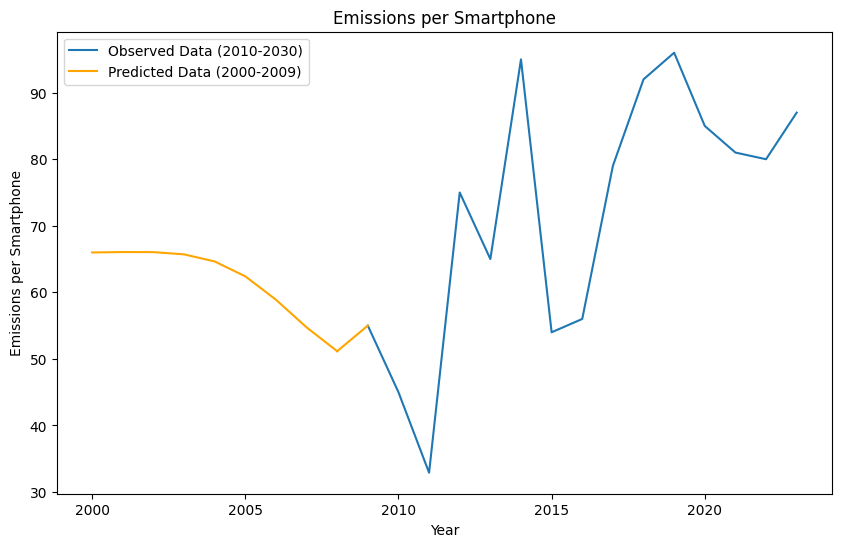

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2009, 2024),
    "Emissions per Smartphone": [55, 45, 32.9, 75, 65, 95, 54, 56, 79, 92, 96, 85, 81, 80, 87]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Emissions per Smartphone'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2009).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Emissions per Smartphone": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions per Smartphone'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Emissions per Smartphone'].iloc[-1], df['Emissions per Smartphone'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Emissions per Smartphone'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Emissions per Smartphone')
plt.xlabel('Year')
plt.ylabel('Emissions per Smartphone')
plt.legend()
plt.show()

### b. Predict Future values:

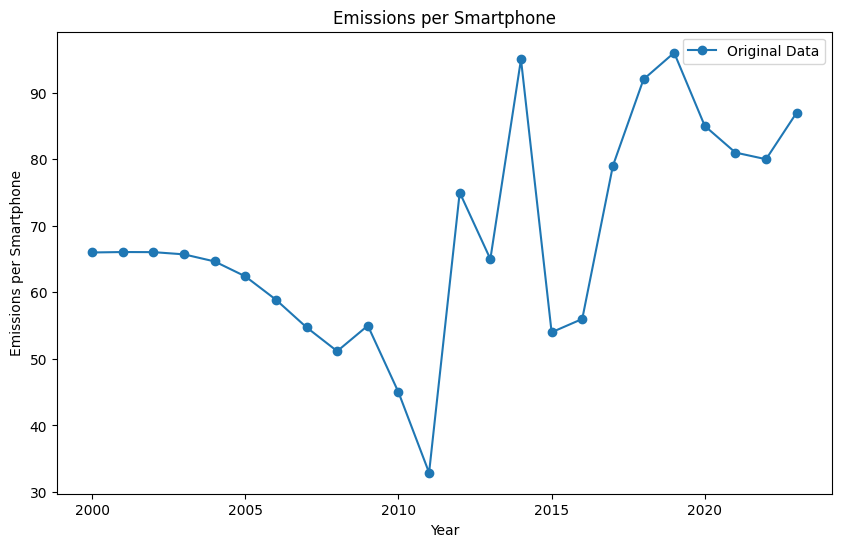

Mean Squared Error for each model:
Linear Regression: 214.25972540291653
Ridge Regression: 214.27735638069902
Lasso Regression: 214.51751919763004
SVR: 229.95803128843232

Best model: Linear Regression


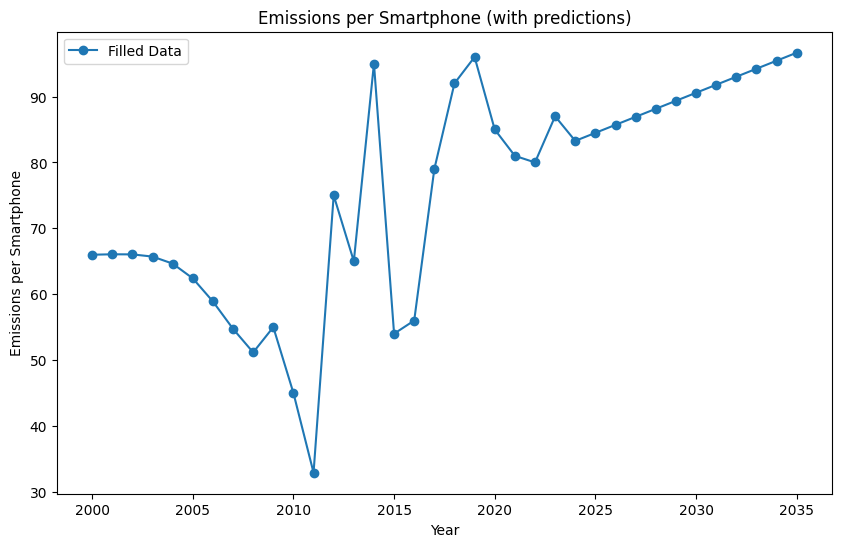


Filled DataFrame:
    Year  Emissions per Smartphone
0   2000                 65.989935
1   2001                 66.055624
2   2002                 66.040707
3   2003                 65.707053
4   2004                 64.641446
5   2005                 62.402340
6   2006                 58.896718
7   2007                 54.740072
8   2008                 51.159705
9   2009                 55.000000
10  2010                 45.000000
11  2011                 32.900000
12  2012                 75.000000
13  2013                 65.000000
14  2014                 95.000000
15  2015                 54.000000
16  2016                 56.000000
17  2017                 79.000000
18  2018                 92.000000
19  2019                 96.000000
20  2020                 85.000000
21  2021                 81.000000
22  2022                 80.000000
23  2023                 87.000000
24  2024                 83.269745
25  2025                 84.486213
26  2026                 85.702680
2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Emissions per Smartphone": [65.989935, 66.055624, 66.040707, 65.707053, 64.641446, 62.40234, 58.896718, 54.740072, 51.159705, 
                                 55, 45, 32.9, 75, 65, 95, 54, 56, 79, 92, 96, 85, 81, 80, 87,
                                np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
                                ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions per Smartphone'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Emissions per Smartphone')
plt.title('Emissions per Smartphone')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Emissions per Smartphone']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Emissions per Smartphone'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions per Smartphone'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Emissions per Smartphone')
plt.title('Emissions per Smartphone (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 15. Fillup column "Tablet Energy demand yearly TEC":

### a. Predict past values:

{'Linear Regression': 0.06019160233296524, 'Ridge Regression': 0.060479386246959636, 'Lasso Regression': 0.0617756910074818}
The best model is: Linear Regression with MSE: 0.06019160233296524
    Year  Predicted Tablet Energy demand yearly TEC
0   2000                                  13.393554
1   2001                                  13.503349
2   2002                                  13.614044
3   2003                                  13.725646
4   2004                                  13.838163
5   2005                                  13.951602
6   2006                                  14.065971
7   2007                                  14.181278
8   2008                                  14.297530
9   2009                                  14.414735
10  2010                                  14.532900


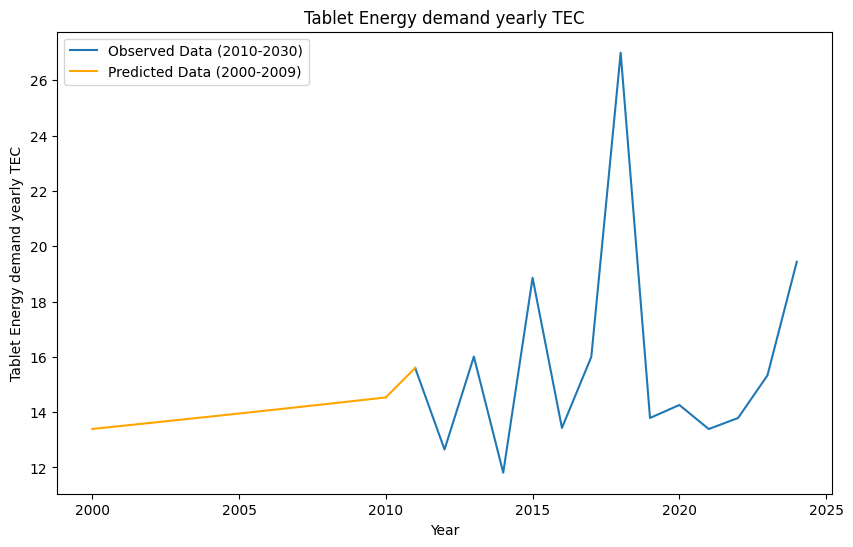

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2011, 2025),
    "Tablet Energy demand yearly TEC": [15.6, 12.65, 16.01, 11.81, 18.86, 13.43, 16, 27, 13.79, 14.26, 13.39, 13.79, 15.33, 19.44]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Tablet Energy demand yearly TEC'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    #"SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2011).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Tablet Energy demand yearly TEC": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Tablet Energy demand yearly TEC'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Tablet Energy demand yearly TEC'].iloc[-1], df['Tablet Energy demand yearly TEC'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Tablet Energy demand yearly TEC'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Tablet Energy demand yearly TEC')
plt.xlabel('Year')
plt.ylabel('Tablet Energy demand yearly TEC')
plt.legend()
plt.show()

### b. Predict Future values:

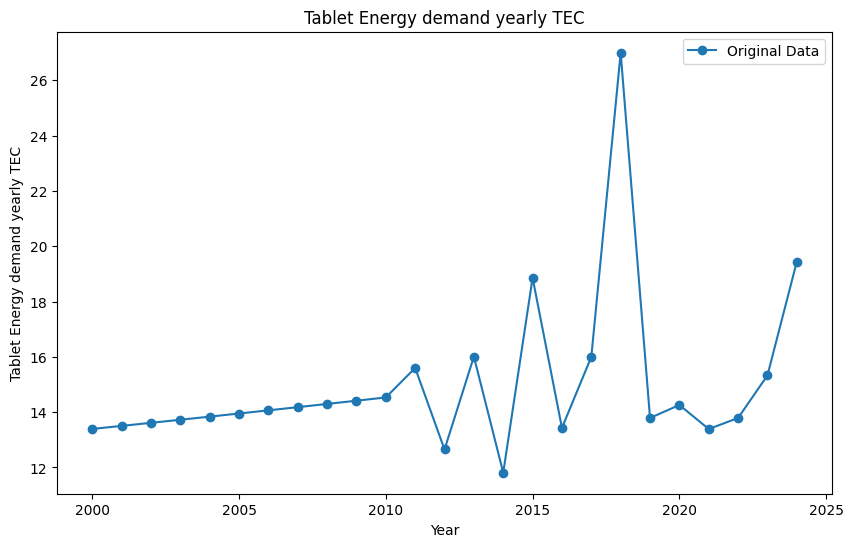

Mean Squared Error for each model:
Linear Regression: 18.580364112244837
Ridge Regression: 18.58193555674228
Lasso Regression: 18.867476724617774
SVR: 22.464662016280844

Best model: Linear Regression


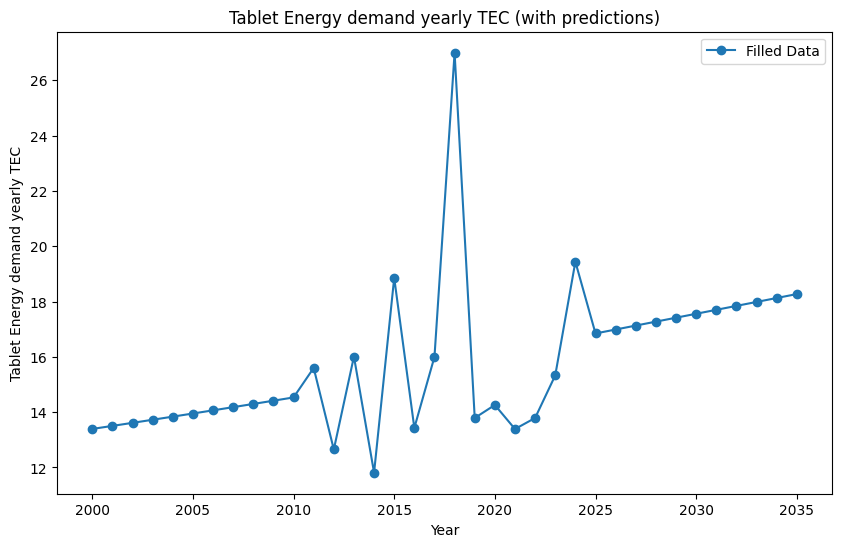


Filled DataFrame:
    Year  Tablet Energy demand yearly TEC
0   2000                        13.393554
1   2001                        13.503349
2   2002                        13.614044
3   2003                        13.725646
4   2004                        13.838163
5   2005                        13.951602
6   2006                        14.065971
7   2007                        14.181278
8   2008                        14.297530
9   2009                        14.414735
10  2010                        14.532900
11  2011                        15.600000
12  2012                        12.650000
13  2013                        16.010000
14  2014                        11.810000
15  2015                        18.860000
16  2016                        13.430000
17  2017                        16.000000
18  2018                        27.000000
19  2019                        13.790000
20  2020                        14.260000
21  2021                        13.390000
22  2022       

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Tablet Energy demand yearly TEC": [13.393554, 13.503349, 13.614044, 13.725646, 13.838163, 13.951602, 14.065971, 14.181278, 14.29753, 14.414735, 14.5329, 
                                 15.6, 12.65, 16.01, 11.81, 18.86, 13.43, 16, 27, 13.79, 14.26, 13.39, 13.79, 15.33, 19.44,
                                np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
                                ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Tablet Energy demand yearly TEC'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Tablet Energy demand yearly TEC')
plt.title('Tablet Energy demand yearly TEC')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Tablet Energy demand yearly TEC']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Tablet Energy demand yearly TEC'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Tablet Energy demand yearly TEC'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Tablet Energy demand yearly TEC')
plt.title('Tablet Energy demand yearly TEC (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 16. Fillup column"Emissions per Tablet":

### a. Predict previous values:

{'Linear Regression': 0.06767596137282857, 'Ridge Regression': 0.0681653994472183, 'Lasso Regression': 0.07037004284443245, 'SVR': 0.028774505809955525}
The best model is: SVR with MSE: 0.028774505809955525
    Year  Predicted Emissions per Tablet
0   2000                      124.913728
1   2001                      124.731828
2   2002                      124.189902
3   2003                      122.795760
4   2004                      119.737517
5   2005                      114.126165
6   2006                      105.745522
7   2007                       95.956710
8   2008                       87.787094
9   2009                       84.956278
10  2010                       91.003909


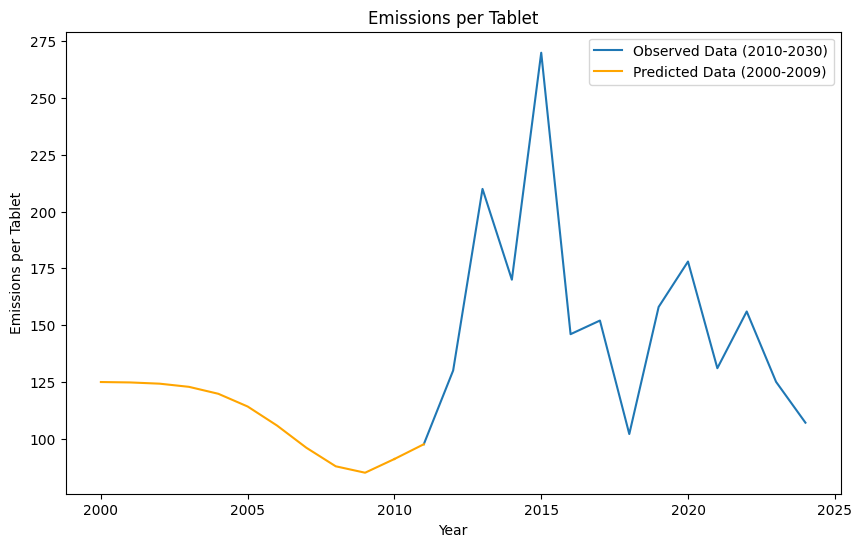

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2011, 2025),
    "Emissions per Tablet": [97.5, 130, 210, 170, 270, 146, 152, 102, 158, 178, 131, 156, 125, 107]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Emissions per Tablet'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2011).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Emissions per Tablet": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions per Tablet'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Emissions per Tablet'].iloc[-1], df['Emissions per Tablet'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Emissions per Tablet'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Emissions per Tablet')
plt.xlabel('Year')
plt.ylabel('Emissions per Tablet')
plt.legend()
plt.show()

### b. Predict Future value:

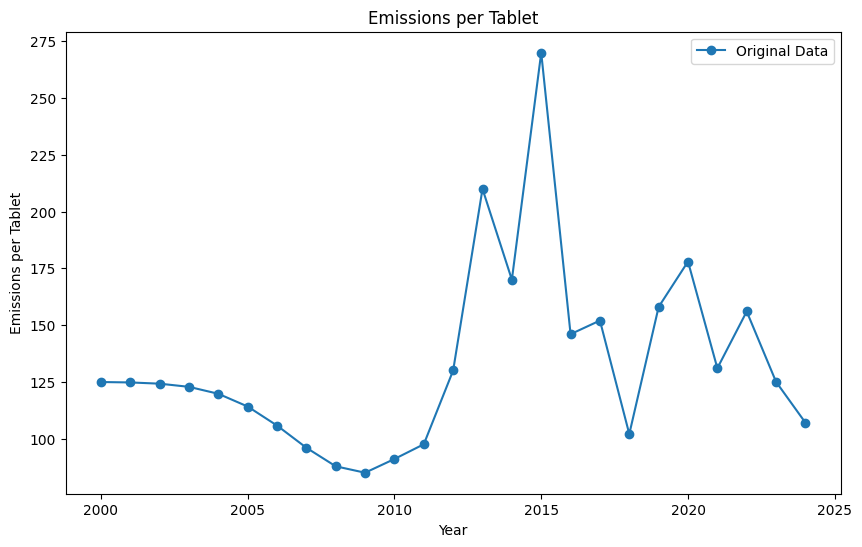

Mean Squared Error for each model:
Linear Regression: 1356.5147965465012
Ridge Regression: 1356.2765671207012
Lasso Regression: 1354.5649233705308

Best model: Lasso Regression


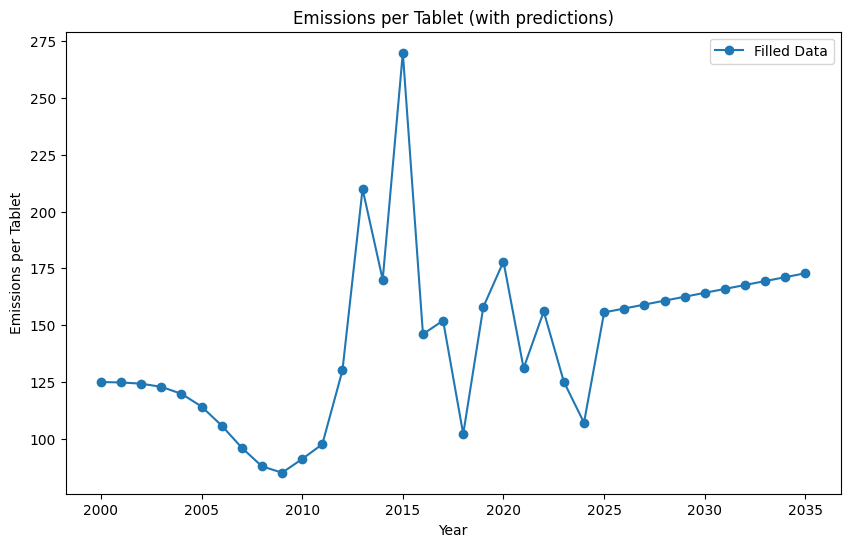


Filled DataFrame:
    Year  Emissions per Tablet
0   2000            124.913728
1   2001            124.731828
2   2002            124.189902
3   2003            122.795760
4   2004            119.737517
5   2005            114.126165
6   2006            105.745522
7   2007             95.956710
8   2008             87.787094
9   2009             84.956278
10  2010             91.003909
11  2011             97.500000
12  2012            130.000000
13  2013            210.000000
14  2014            170.000000
15  2015            270.000000
16  2016            146.000000
17  2017            152.000000
18  2018            102.000000
19  2019            158.000000
20  2020            178.000000
21  2021            131.000000
22  2022            156.000000
23  2023            125.000000
24  2024            107.000000
25  2025            155.581369
26  2026            157.307800
27  2027            159.034230
28  2028            160.760660
29  2029            162.487090
30  2030            

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Emissions per Tablet": [124.913728, 124.731828, 124.189902, 122.79576, 119.737517, 114.126165, 105.745522, 95.95671, 87.787094, 84.956278, 91.003909, 
                            97.5, 130, 210, 170, 270, 146, 152, 102, 158, 178, 131, 156, 125, 107,
                            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
                            ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions per Tablet'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Emissions per Tablet')
plt.title('Emissions per Tablet')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Emissions per Tablet']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    #"SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Emissions per Tablet'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions per Tablet'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Emissions per Tablet')
plt.title('Emissions per Tablet (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 17. Fillup column "Laptop Energy demand yearly TEC":

### a. Predict previous values:

{'Linear Regression': 0.05628923284232704, 'Ridge Regression': 0.056492348912587934, 'Lasso Regression': 0.05757001758364129, 'SVR': 0.05114330696380917}
The best model is: SVR with MSE: 0.05114330696380917
   Year  Predicted Laptop Energy demand yearly TEC
0  2000                                  20.814829
1  2001                                  21.043567
2  2002                                  21.453617
3  2003                                  22.102450
4  2004                                  22.991082
5  2005                                  23.999730
6  2006                                  24.849015
7  2007                                  25.166719
8  2008                                  24.699925


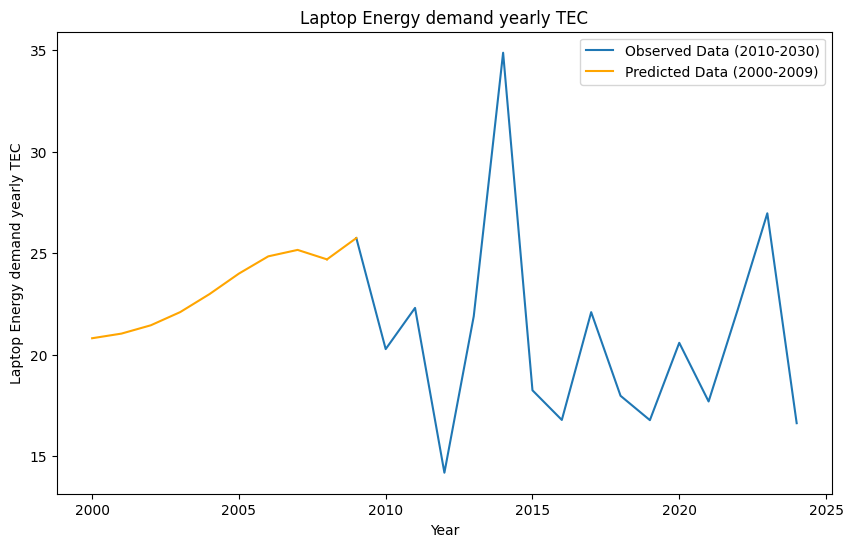

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2009, 2025),
    "Laptop Energy demand yearly TEC": [25.75, 20.28, 22.31, 14.19, 21.9, 34.88, 18.25, 16.79, 22.1, 17.98, 16.78, 20.59, 17.7, 22.26, 26.97, 16.63]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Laptop Energy demand yearly TEC'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2009).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Laptop Energy demand yearly TEC": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Laptop Energy demand yearly TEC'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Laptop Energy demand yearly TEC'].iloc[-1], df['Laptop Energy demand yearly TEC'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Laptop Energy demand yearly TEC'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Laptop Energy demand yearly TEC')
plt.xlabel('Year')
plt.ylabel('Laptop Energy demand yearly TEC')
plt.legend()
plt.show()

### b. Predict Future values:

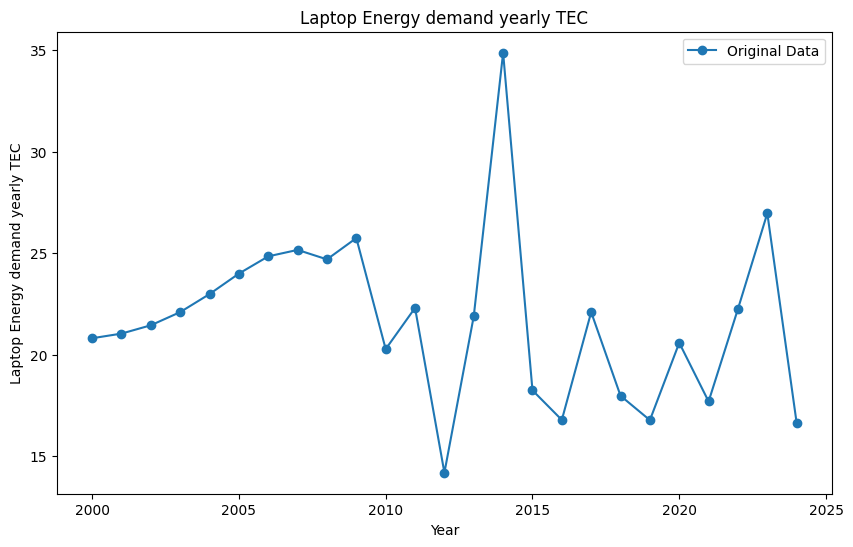

Mean Squared Error for each model:
Linear Regression: 10.89771560350107
Ridge Regression: 10.895976603458516
Lasso Regression: 10.729974173159068

Best model: Lasso Regression


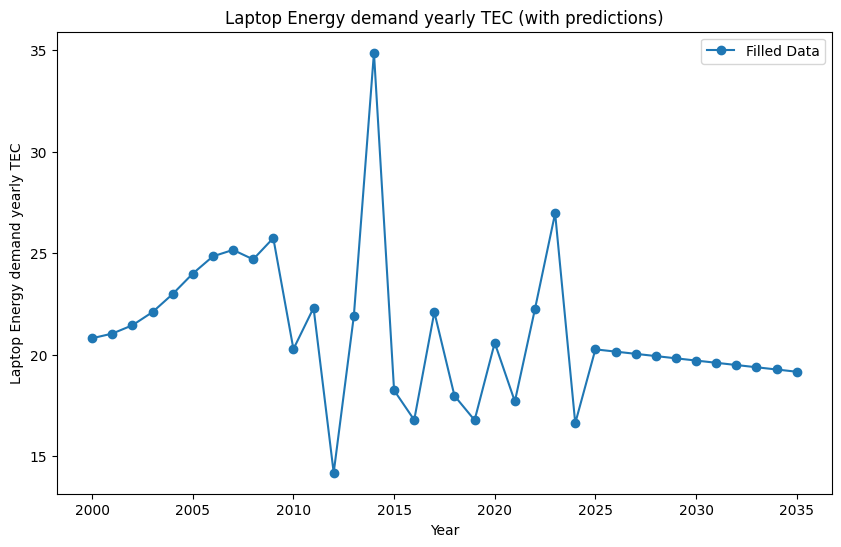


Filled DataFrame:
    Year  Laptop Energy demand yearly TEC
0   2000                        20.814829
1   2001                        21.043567
2   2002                        21.453617
3   2003                        22.102450
4   2004                        22.991082
5   2005                        23.999730
6   2006                        24.849015
7   2007                        25.166719
8   2008                        24.699925
9   2009                        25.750000
10  2010                        20.280000
11  2011                        22.310000
12  2012                        14.190000
13  2013                        21.900000
14  2014                        34.880000
15  2015                        18.250000
16  2016                        16.790000
17  2017                        22.100000
18  2018                        17.980000
19  2019                        16.780000
20  2020                        20.590000
21  2021                        17.700000
22  2022       

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Laptop Energy demand yearly TEC": [20.814829, 21.043567, 21.453617, 22.10245, 22.991082, 23.99973, 24.849015, 25.166719, 24.699925,
                                        25.75, 20.28, 22.31, 14.19, 21.9, 34.88, 18.25, 16.79, 22.1, 17.98, 16.78, 20.59, 17.7, 22.26, 26.97, 16.63,
                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Laptop Energy demand yearly TEC'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Laptop Energy demand yearly TEC')
plt.title('Laptop Energy demand yearly TEC')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Laptop Energy demand yearly TEC']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    #"SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Laptop Energy demand yearly TEC'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Laptop Energy demand yearly TEC'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Laptop Energy demand yearly TEC')
plt.title('Laptop Energy demand yearly TEC (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 18. Fillup Column "Emissions per laptop":

### a. Predict previous values:

{'Linear Regression': 0.054558873027724435, 'Ridge Regression': 0.06345773161211044, 'Lasso Regression': 0.11067221883712007, 'SVR': 0.03266271289420214}
The best model is: SVR with MSE: 0.03266271289420214
   Year  Predicted Emissions per laptop
0  2000                      253.357227
1  2001                      255.325767
2  2002                      258.920899
3  2003                      264.751605
4  2004                      273.046619
5  2005                      283.165768
6  2006                      293.338207
7  2007                      301.251707
8  2008                      305.823796


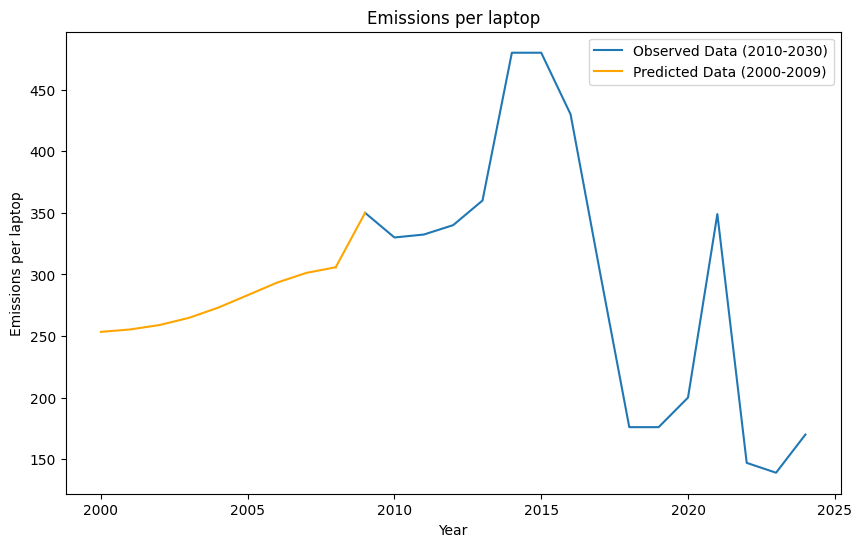

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2009, 2025),
    "Emissions per laptop": [350, 330, 332.38, 340, 360, 480, 480, 430, 302, 176, 176, 200, 349, 147, 139, 170]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Emissions per laptop'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2009).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Emissions per laptop": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions per laptop'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Emissions per laptop'].iloc[-1], df['Emissions per laptop'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Emissions per laptop'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Emissions per laptop')
plt.xlabel('Year')
plt.ylabel('Emissions per laptop')
plt.legend()
plt.show()

### b. Predict Future values:

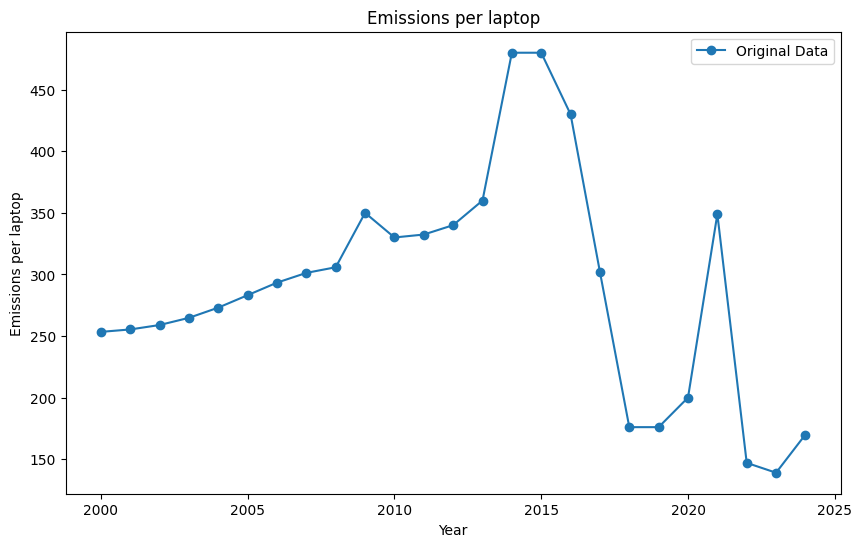

Mean Squared Error for each model:
Linear Regression: 8197.684638312103
Ridge Regression: 8198.22255408363
Lasso Regression: 8209.407684051337

Best model: Linear Regression


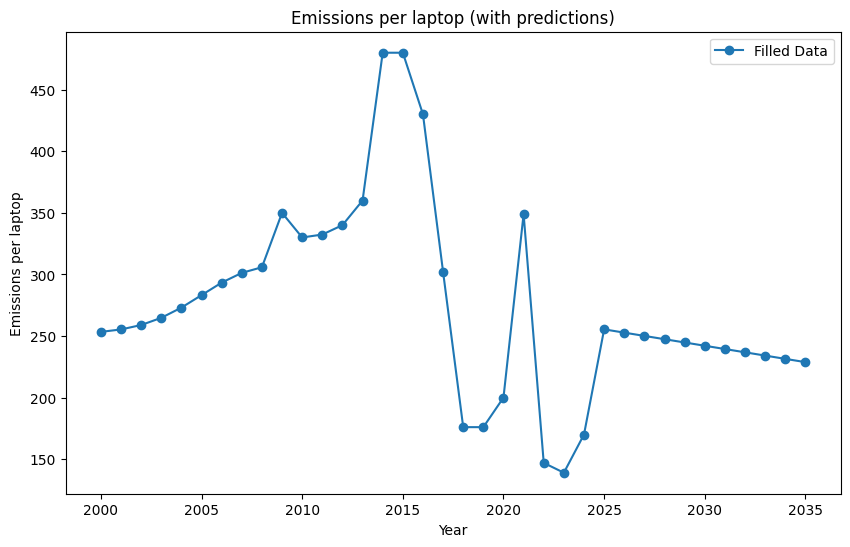


Filled DataFrame:
    Year  Emissions per laptop
0   2000            253.357227
1   2001            255.325767
2   2002            258.920899
3   2003            264.751605
4   2004            273.046619
5   2005            283.165768
6   2006            293.338207
7   2007            301.251707
8   2008            305.823796
9   2009            350.000000
10  2010            330.000000
11  2011            332.380000
12  2012            340.000000
13  2013            360.000000
14  2014            480.000000
15  2015            480.000000
16  2016            430.000000
17  2017            302.000000
18  2018            176.000000
19  2019            176.000000
20  2020            200.000000
21  2021            349.000000
22  2022            147.000000
23  2023            139.000000
24  2024            170.000000
25  2025            255.401065
26  2026            252.738496
27  2027            250.075927
28  2028            247.413358
29  2029            244.750788
30  2030            

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Emissions per laptop": [253.357227, 255.325767, 258.920899, 264.751605, 273.046619, 283.165768, 293.338207, 301.251707, 305.823796, 
                            350, 330, 332.38, 340, 360, 480, 480, 430, 302, 176, 176, 200, 349, 147, 139, 170,
                            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions per laptop'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Emissions per laptop')
plt.title('Emissions per laptop')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Emissions per laptop']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    #"SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Emissions per laptop'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions per laptop'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Emissions per laptop')
plt.title('Emissions per laptop (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 19. Fillup column "Desktop PC Energy demand yearly TEC":

### a. Predict previous values:

{'Linear Regression': 0.04060957350507192, 'Ridge Regression': 0.04271651411062865, 'Lasso Regression': 0.053036223199069935, 'SVR': 0.03380592266289291}
The best model is: SVR with MSE: 0.03380592266289291
   Year  Predicted Desktop PC Energy demand yearly TEC
0  2000                                     223.320438
1  2001                                     223.316241
2  2002                                     223.305475
3  2003                                     223.283886
4  2004                                     223.257446
5  2005                                     223.277547
6  2006                                     223.518911
7  2007                                     224.399458
8  2008                                     226.685430


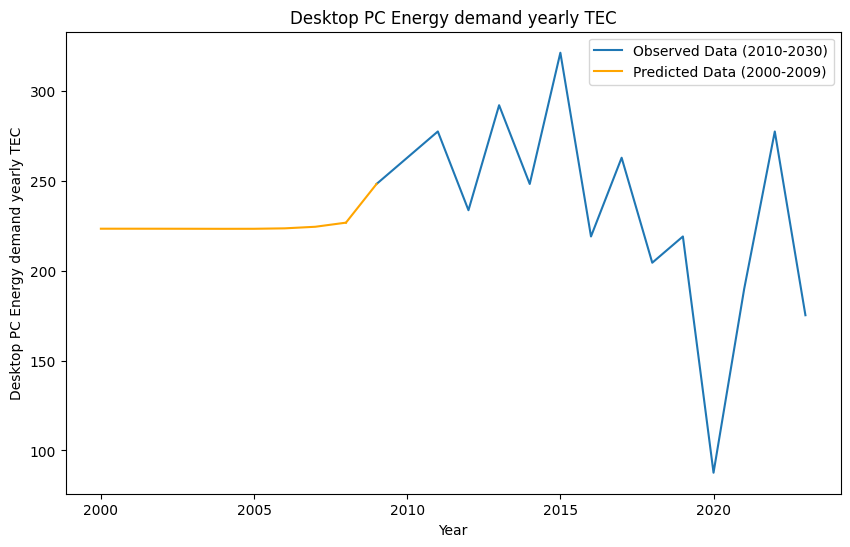

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2009, 2024),
    "Desktop PC Energy demand yearly TEC": [248.2, 262.8, 277.4, 233.6, 292, 248.2, 321.2, 219, 262.8, 204.4, 219, 87.6, 189.8, 277.4, 175.2]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Desktop PC Energy demand yearly TEC'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2009).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Desktop PC Energy demand yearly TEC": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Desktop PC Energy demand yearly TEC'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Desktop PC Energy demand yearly TEC'].iloc[-1], df['Desktop PC Energy demand yearly TEC'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Desktop PC Energy demand yearly TEC'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Desktop PC Energy demand yearly TEC')
plt.xlabel('Year')
plt.ylabel('Desktop PC Energy demand yearly TEC')
plt.legend()
plt.show()

### b. Predict future values:

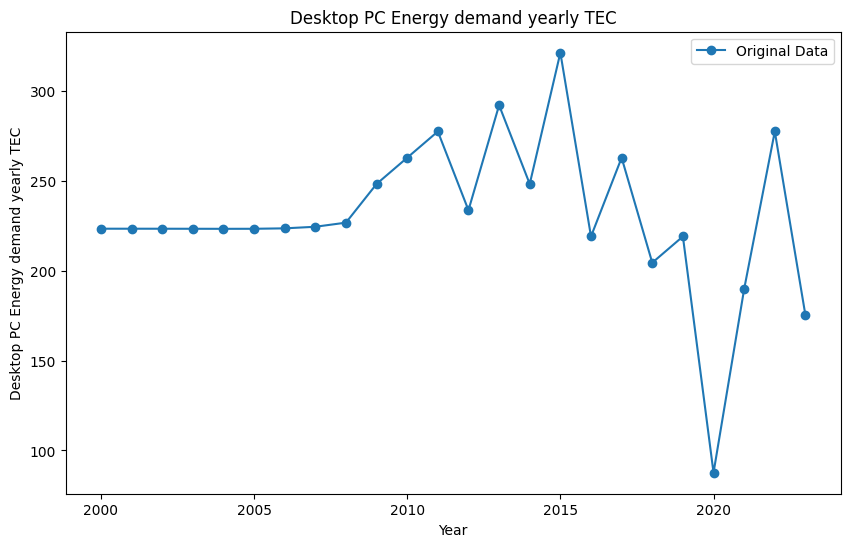

Mean Squared Error for each model:
Linear Regression: 2308.2187653014507
Ridge Regression: 2307.083886605552
Lasso Regression: 2300.25459103366

Best model: Lasso Regression


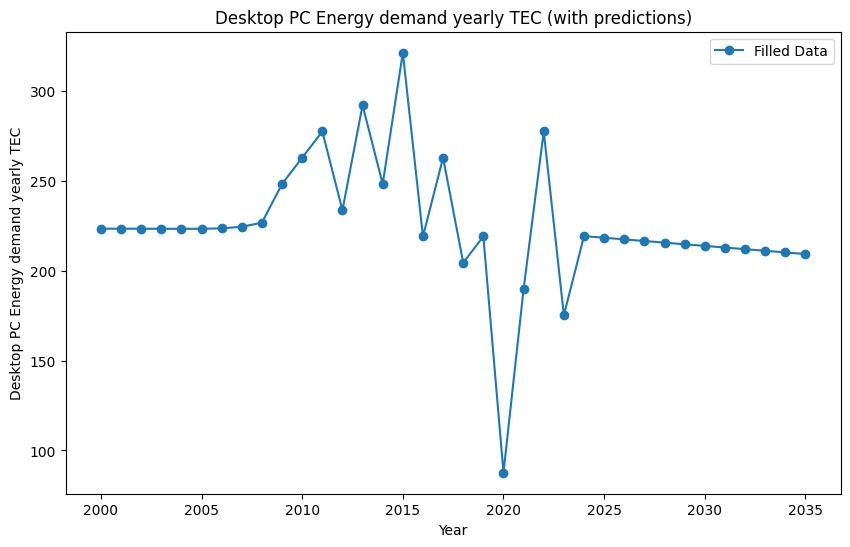


Filled DataFrame:
    Year  Desktop PC Energy demand yearly TEC
0   2000                           223.320438
1   2001                           223.316241
2   2002                           223.305475
3   2003                           223.283886
4   2004                           223.257446
5   2005                           223.277547
6   2006                           223.518911
7   2007                           224.399458
8   2008                           226.685430
9   2009                           248.200000
10  2010                           262.800000
11  2011                           277.400000
12  2012                           233.600000
13  2013                           292.000000
14  2014                           248.200000
15  2015                           321.200000
16  2016                           219.000000
17  2017                           262.800000
18  2018                           204.400000
19  2019                           219.000000
20  2020       

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Desktop PC Energy demand yearly TEC": [223.320438, 223.316241, 223.305475, 223.283886, 223.257446, 223.277547, 223.518911, 224.399458, 226.68543, 
                            248.2, 262.8, 277.4, 233.6, 292, 248.2, 321.2, 219, 262.8, 204.4, 219, 87.6, 189.8, 277.4, 175.2,
                            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Desktop PC Energy demand yearly TEC'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Desktop PC Energy demand yearly TEC')
plt.title('Desktop PC Energy demand yearly TEC')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Desktop PC Energy demand yearly TEC']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    #"SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Desktop PC Energy demand yearly TEC'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Desktop PC Energy demand yearly TEC'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Desktop PC Energy demand yearly TEC')
plt.title('Desktop PC Energy demand yearly TEC (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 20. Fillup column "Emissions per PC":

### a. Predict previous values:

{'Linear Regression': 0.04029338548566674, 'Ridge Regression': 0.04256407954547634, 'Lasso Regression': 0.05368584636903367, 'SVR': 0.03288016683990385}
The best model is: SVR with MSE: 0.03288016683990385
   Year  Predicted Emissions per PC
0  2000                  788.844221
1  2001                  788.841729
2  2002                  788.836398
3  2003                  788.832347
4  2004                  788.862496
5  2005                  789.057822
6  2006                  789.798737
7  2007                  791.954387
8  2008                  797.108967


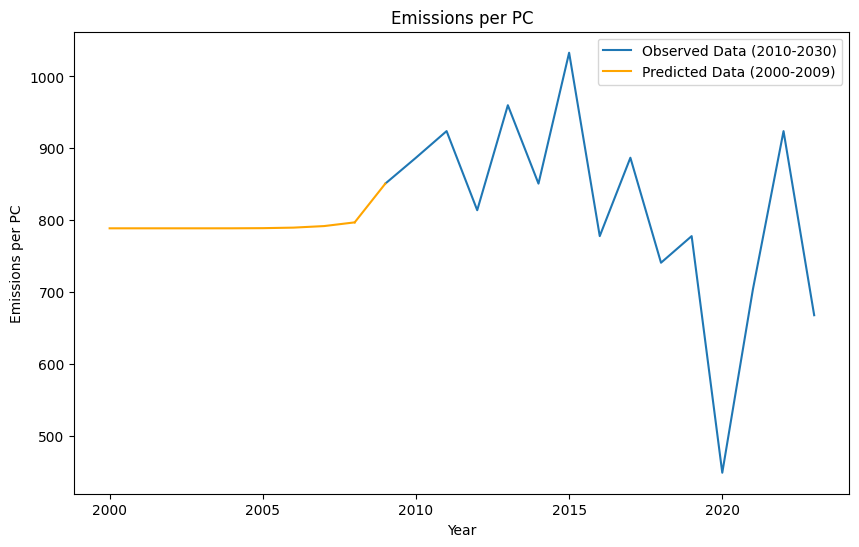

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2009, 2024),
    "Emissions per PC": [851, 887, 924, 814, 960, 851, 1033, 778, 887, 741, 778, 449, 704, 924, 668]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Emissions per PC'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2009).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Emissions per PC": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions per PC'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Emissions per PC'].iloc[-1], df['Emissions per PC'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Emissions per PC'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Emissions per PC')
plt.xlabel('Year')
plt.ylabel('Emissions per PC')
plt.legend()
plt.show()

### b. Predict future values:

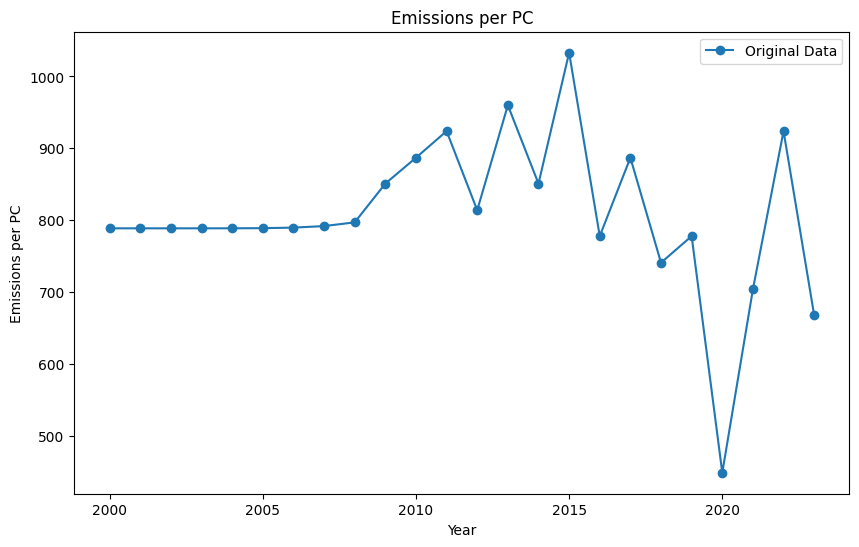

Mean Squared Error for each model:
Linear Regression: 14438.094730138939
Ridge Regression: 14430.956759667919
Lasso Regression: 14418.151280468739

Best model: Lasso Regression


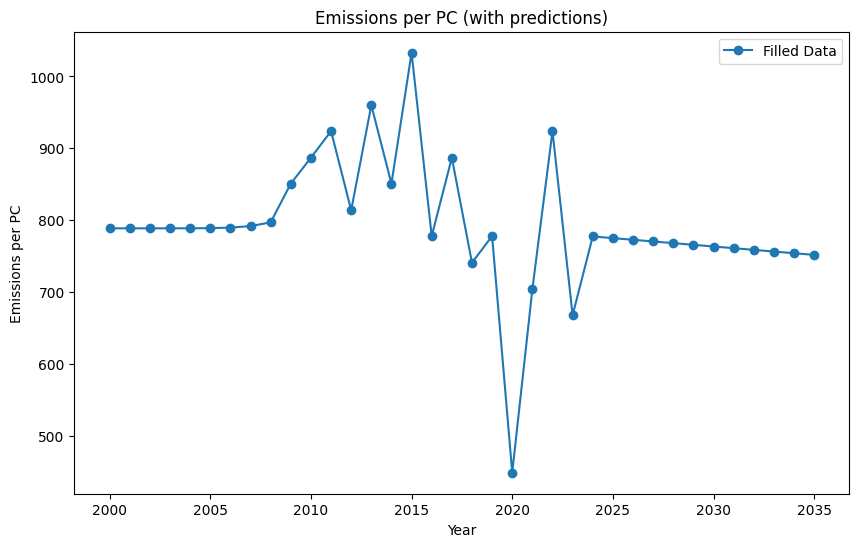


Filled DataFrame:
    Year  Emissions per PC
0   2000        788.844221
1   2001        788.841729
2   2002        788.836398
3   2003        788.832347
4   2004        788.862496
5   2005        789.057822
6   2006        789.798737
7   2007        791.954387
8   2008        797.108967
9   2009        851.000000
10  2010        887.000000
11  2011        924.000000
12  2012        814.000000
13  2013        960.000000
14  2014        851.000000
15  2015       1033.000000
16  2016        778.000000
17  2017        887.000000
18  2018        741.000000
19  2019        778.000000
20  2020        449.000000
21  2021        704.000000
22  2022        924.000000
23  2023        668.000000
24  2024        777.551207
25  2025        775.218180
26  2026        772.885153
27  2027        770.552126
28  2028        768.219099
29  2029        765.886072
30  2030        763.553045
31  2031        761.220017
32  2032        758.886990
33  2033        756.553963
34  2034        754.220936
35  2035 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Emissions per PC": [788.844221, 788.841729, 788.836398, 788.832347, 788.862496, 789.057822, 789.798737, 791.954387, 797.108967, 
                            851, 887, 924, 814, 960, 851, 1033, 778, 887, 741, 778, 449, 704, 924, 668,
                            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}


# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions per PC'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Emissions per PC')
plt.title('Emissions per PC')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Emissions per PC']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    #"SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Emissions per PC'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions per PC'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Emissions per PC')
plt.title('Emissions per PC (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 21. Fillup column "ICT Devices Carbon footprint":